# <center>Temps de Réponse de la Brigade des Pompiers de Londres</center>

In [241]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [242]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj

#plt.style.use('ggplot')
%matplotlib inline

In [243]:
print(pd.__version__)

2.2.1


In [244]:
from IPython.display import display_markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [245]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [246]:
pd.options.display.max_info_columns

100

In [247]:
import os
root_folder_path = os.path.abspath('..')
data_raw_path = os.path.join(root_folder_path, "data", "raw")
incidents_folder_path = os.path.join(data_raw_path, "london-fire-brigade-incident-records")
mobilisation_folder_path = os.path.join(data_raw_path, "london-fire-brigade-mobilisation-records")

# **1.Lecture des données (Fichiers Incidents)**

In [295]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, r"LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, r"LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_14192\32810285.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, r"LFB Incident data from 2009 - 2017.csv"),


In [296]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
# https://www.geeksforgeeks.org/prevent-duplicated-columns-when-joining-two-pandas-dataframes/
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)
incidents_df.head()

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [297]:
incidents_df.shape

(1691361, 39)

### Acronyms

In [11]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2']).rename(columns={'Column': 'Variable', 'Description2': 'Description'})
display(metadata)

,Variable,Description
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


# **2.Lecture des données (Fichiers Mobilisation)**

In [298]:
mobilisation_data_from_2009_to_2014 = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data from January 2009 - 2014.csv"),
                                            date_format='%m/%d/%Y %H:%M',
                                            parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                            dayfirst=False,
                                            sep=",",
                                            encoding='unicode_escape'
                                            )

mobilisation_data_from_2015_to_2020 = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data from 2015 - 2020.csv"),
                                            date_format='%m/%d/%Y %H:%M',
                                            parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                            dayfirst=False,
                                            sep=",",
                                            encoding='unicode_escape')

mobilisation_data_from_2021_to_onwards = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data 2021 - 2024.csv"),
                                                date_format='%m/%d/%Y %H:%M',
                                                parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                                dayfirst=False,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_14192\2374534265.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  mobilisation_data_from_2015_to_2020 = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data from 2015 - 2020.csv"),


In [299]:
# Concatenons les 2 DataFrames verticalement.
mobilisations_df = pd.concat([mobilisation_data_from_2009_to_2014, mobilisation_data_from_2015_to_2020,mobilisation_data_from_2021_to_onwards], axis=0)
mobilisations_df.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaT,2009-01-01 00:07:00,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,2009-01-01 00:06:00,2009-01-01 00:08:00,253.0,89.0,342,2009-01-01 00:12:00,2009-01-01 00:12:00,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


In [300]:
mobilisations_df.shape

(2358050, 22)

# **Merge des 2 datsets pour analyse**

In [301]:
# https://www.geeksforgeeks.org/prevent-duplicated-columns-when-joining-two-pandas-dataframes/
#df = pd.merge(incidents_df, mobilisations_df, on='IncidentNumber', how='outer', suffixes=('_xxxxx', '_yyyyy'))
#df = pd.merge(incidents_df, mobilisations_df, on=['IncidentNumber','CalYear','HourOfCall'], how='inner') 	
df = pd.merge(incidents_df, mobilisations_df, how='inner', 
                  left_on=['IncidentNumber','CalYear','HourOfCall'],
                  right_on=['IncidentNumber','CalYear','HourOfCall'])

In [302]:
del incidents_df, mobilisations_df

In [303]:
df.shape

(2330947, 58)

In [304]:
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,38426,H271,1,2009-01-01 00:02:00,NaT,2009-01-01 00:07:00,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,38427,H212,2,2009-01-01 00:02:00,2009-01-01 00:06:00,2009-01-01 00:08:00,253.0,89.0,342,2009-01-01 00:12:00,2009-01-01 00:12:00,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


# **3. Exploratory Data Analysis /Analyse exploratoire des données**

## Objectif :

#### Analyse de Forme [(voir détails ici)](#) :
- **Variable target** : FirstPumpArriving_AttendanceTime
- **Lignes et colonnes** : (2330947, 58)
- **Types de variables** : qualitatives : 20, quantitatives : 19
- **Analyse des valeurs manquantes** :

    - Liste des colonnes n'ayant pas de Nan à la 1ere analyse : **['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall','IncidentGroup', 'StopCodeDescription',         'PropertyCategory','PropertyType', 'AddressQualifier', 'Postcode_district','IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase','Easting_rounded', 'Northing_rounded', 'FRS', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'MonthOfCall']**

    - Il y'a **19** variables qui ont des valeurs NaN.
        - Liste des colonnnes ayant plus de 49% de Nan : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation']**
        - Les valeurs nulles de colonnes **FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls** sont remplacées par leur mode         
        
    - Il faudra checker le cas DateOfCall avec les NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - La variable cible **FirstPumpArriving_AttendanceTime** contient des NaN (On checkera si on peut remplir les NaN plus tard) ou les supprimer les lignes.
    
- **Traitement sur les colonnes**
    - Suppression des colonnes ayannt beaucoupt de valeurs nulles : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation']**
    - Suppression des colonnes n'ayant pas d'impact sur le dataset : **['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation']**
    - 
    - Le type de la colonne **DateOfCall**  et **TimeOfCall** a été changée en Datetime
    
- **Signification des variables** :
    -  variables continues pas standardisées
    - 

- **Relation Variables catégorielles / Target** :
    - Ces varibales on plus d'impact sur la target
    - 
    - 


- **Relation Variables continuess / Target** :
    - Ces varibales on moins d'impact sur la target
    - 
    - 
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - 
    - 
    - 
    - 
    - 
    - 


    

### **3.1 Analyse de la forme des données**

In [305]:
df.shape

(2330947, 58)

Ce dataset **incidents** après merge contient **2330947 lignes et 58 colonnes**

In [306]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330947 entries, 0 to 2330946
Data columns (total 58 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 int64         
 3   TimeOfCall                              object        
 4   HourOfCall                              int64         
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       ob

None

In [307]:
df['CalYear'] = df['CalYear'].astype('category')
df['HourOfCall'] = df['HourOfCall'].astype('category')

In [262]:
df['TimeOfCall'].value_counts()

TimeOfCall
18:15:26    76
20:20:09    73
18:24:07    73
17:33:23    73
18:23:58    73
            ..
5:46:44      1
5:53:08      1
4:36:23      1
6:59:50      1
4:35:38      1
Name: count, Length: 121475, dtype: int64

In [263]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330947 entries, 0 to 2330946
Data columns (total 58 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 category      
 3   TimeOfCall                              object        
 4   HourOfCall                              category      
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       ob

None

object            28
float64           14
int64              8
datetime64[ns]     6
category           1
category           1
Name: count, dtype: int64

<Axes: ylabel='count'>

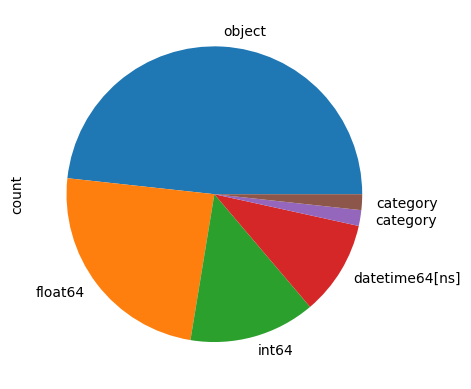

In [308]:
display(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

In [309]:
# Analyse descriptive des variables continue.
# df.select_dtypes(exclude=['object']).describe()
df.select_dtypes(include=[np.number]).describe()

,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId
count,2.170057e+06,2.142037e+06,1.074587e+06,1.074587e+06,2.330947e+06,2.330947e+06,1.074587e+06,1.074587e+06,2.330941e+06,1.384592e+06,2.330947e+06,2.330947e+06,2.330947e+06,2.330947e+06,2.330947e+06,2.329628e+06,2.330947e+06,2.303347e+06,2.303259e+06,2.330947e+06,2.330947e+06,573813.000000
mean,2.049641e+10,2.032692e+07,5.305690e+05,1.803752e+05,5.305705e+05,1.804837e+05,5.144753e+01,-1.197541e-01,3.105918e+02,3.902971e+02,1.671302e+00,1.983768e+00,2.046509e+00,8.544883e+01,4.498692e+02,1.361257e+00,4.749432e+06,7.968062e+01,2.731028e+02,3.510775e+02,1.454842e+00,10.480120
std,4.641646e+10,4.361143e+06,1.027932e+04,7.357791e+03,9.630102e+03,7.289835e+03,1.752723e+00,1.481688e-01,1.299570e+02,1.495994e+02,9.310543e-01,1.097634e+00,1.835823e+00,4.151575e+02,2.207469e+03,1.780130e+00,1.309581e+06,4.450663e+01,1.503802e+02,1.533674e+02,7.654523e-01,2.206451
min,0.000000e+00,0.000000e+00,5.035820e+05,1.559010e+05,5.035500e+05,1.559500e+05,0.000000e+00,-5.101547e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00,3.842600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000
25%,0.000000e+00,2.040098e+07,5.252120e+05,1.760070e+05,5.252500e+05,1.761500e+05,5.146915e+01,-1.970212e-01,2.280000e+02,2.930000e+02,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.900000e+02,1.000000e+00,3.962236e+06,5.500000e+01,1.720000e+02,2.510000e+02,1.000000e+00,9.000000
50%,0.000000e+00,2.120132e+07,5.308090e+05,1.809880e+05,5.308500e+05,1.810500e+05,5.151293e+01,-1.167451e-01,2.910000e+02,3.650000e+02,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.330000e+02,1.000000e+00,4.848671e+06,7.400000e+01,2.460000e+02,3.250000e+02,1.000000e+00,12.000000
75%,1.000833e+10,2.210199e+07,5.366730e+05,1.849610e+05,5.361500e+05,1.851500e+05,5.154796e+01,-3.105795e-02,3.680000e+02,4.570000e+02,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.640000e+02,1.000000e+00,5.752208e+06,9.600000e+01,3.420000e+02,4.210000e+02,2.000000e+00,12.000000
max,2.000044e+11,9.999042e+07,5.611260e+05,2.009060e+05,5.611500e+05,2.009500e+05,5.169167e+01,3.222187e-01,1.200000e+03,1.200000e+03,4.600000e+01,1.060000e+02,4.020000e+02,1.297510e+05,7.093050e+05,3.690000e+02,6.624523e+06,1.192000e+03,1.198000e+03,1.200000e+03,1.300000e+01,13.000000


In [266]:
# Analyse descriptive des variables qualitatives.
#df.select_dtypes(include=['object']).describe()
df.select_dtypes(include=['object','category'],exclude=[np.number]).describe()

,IncidentNumber,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,Resource_Code,PerformanceReporting,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Code,PlusCode_Description,DelayCode_Description
count,2330947,2330947,2330947,2330947,2330947,2330947,507375,2330947,2330947,2330947,1074587,2330947,2330947,2330947,2330947,2330545,2330545,2330545,2330947,2330945,2330920,1384575,2330947,2330947,2330924,2330924,2329794,2330947,2330947,573813
unique,1545943,16,121475,24,3,9,21,9,292,11,115637,324,33,33,33,889,1478,1475,1,102,117,114,187,3,118,118,2,3,3,10
top,053666-07052021,2023,18:15:26,19,False Alarm,AFA,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,SW17 0QT,CR0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Paddington,A242,1,A24,Soho,Home Station,Initial,Initial Mobilisation,Not held up
freq,13,185643,76,145694,1358037,1021761,109657,1243663,297122,1381952,3503,47121,172555,172555,172555,37141,32221,32221,2330947,72349,69338,38815,44747,1545943,75162,75162,2252059,2323090,2323090,341534


In [267]:
df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1823572
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                             1256360
Postcode_district                               0
UPRN                                       160890
USRN                                       188910
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               402
IncGeo_WardName                               402


**Des valeurs manquantes existent la base de données.**

Liste des colonnes ayant des valeurs manquantes.

In [268]:
#(incidents_df.isna().sum()/incidents_df.shape[0]).sort_values(ascending=True)
def pourcentage_de_valeurs_manquantes(data) -> None:

    nombre_de_lignes = data.shape[0]
    
    for i in range(0, len(data.isna().sum(axis=0))):
        print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")

        
df.isna().sum()[df.isna().sum() > 0 ] / df.shape[0] * 100.00

SpecialServiceType                        78.233096
Postcode_full                             53.899123
UPRN                                       6.902345
USRN                                       8.104431
IncGeo_WardCode                            0.017246
IncGeo_WardName                            0.017246
IncGeo_WardNameNew                         0.017246
Easting_m                                 53.899123
Northing_m                                53.899123
Latitude                                  53.899123
Longitude                                 53.899123
IncidentStationGround                      0.000086
FirstPumpArriving_AttendanceTime           0.000257
FirstPumpArriving_DeployedFromStation      0.001158
SecondPumpArriving_AttendanceTime         40.599593
SecondPumpArriving_DeployedFromStation    40.600323
NumCalls                                   0.056586
DateAndTimeMobile                          1.178276
TurnoutTimeSeconds                         1.184068
TravelTimeSe

In [31]:
(df.isna().sum()[df.isna().sum() / df.shape[0] > 0.50 ]).index

Index(['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m',
       'Latitude', 'Longitude', 'DateAndTimeReturned', 'DelayCodeId',
       'DelayCode_Description'],
      dtype='object')

<Axes: >

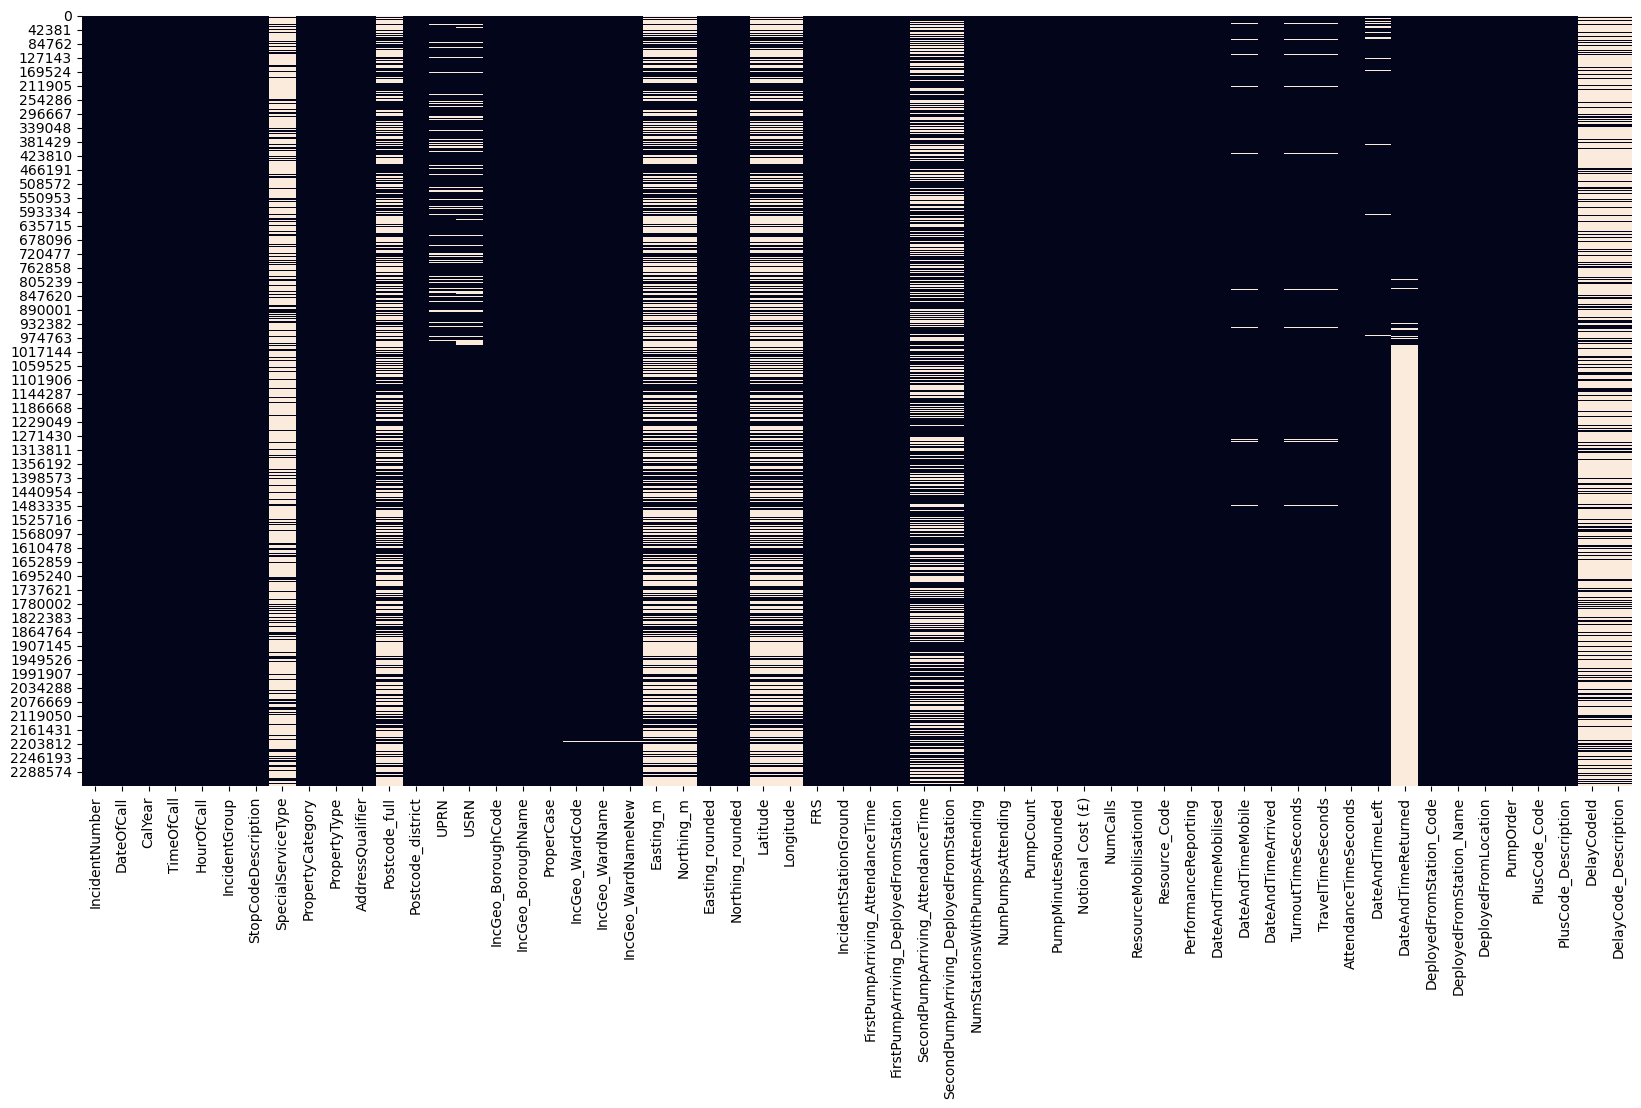

In [269]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### **3.2 Analyse du Fond**


In [34]:
#from ydata_profiling import ProfileReport
#import ydata-profiling
#london_profile = ProfileReport(incidents_df)

#### **3.2.1 Elimination des colonnes inutiles**

Listes des colonnes à supprimer
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

- **FRS**, initule car nous traitons les données de londres,
- **Notional Cost (£)**
- **PropertyType**, doublons
- **ResourceMobilisationId**

In [310]:
df = df.drop(['PropertyType','FRS','Notional Cost (£)','ResourceMobilisationId'],errors ='ignore',axis=1)

**Colonnes ayant beaucoup de valeurs nulles**

- **SpecialServiceType**, contient plus de 78% de valeurs nulles, la colonne  **"StopCodeDescription"** joue déjà le même rôle.
- **Postcode_full** , contient plus de 53% de valeurs nulles, On ne peut pas reconstituer les valeurs nulles,on pourra utiliser la colonne  **"Postcode_district"**.
- **SecondPumpArriving_AttendanceTime** , contient beaucoup de valeurs nulles.
- **SecondPumpArriving_DeployedFromStation** , contient beaucoup valeurs nulles.
- **DateAndTimeReturned**
- **DelayCodeId**
- **DelayCode_Description**

In [311]:
nulls_columns_todrop = [
    'SpecialServiceType',
    'Postcode_full',
    'DateAndTimeReturned',
    'DelayCodeId',
    'DelayCode_Description',
    'SecondPumpArriving_AttendanceTime',
    'SecondPumpArriving_DeployedFromStation'
    ]
df = df.drop(nulls_columns_todrop,errors ='ignore',axis=1)

In [312]:
v84 = pyproj.Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = pyproj.Proj(proj="latlong", k=0.9996012717, ellps="airy",towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = pyproj.Proj(init="world:bng")

# example : ENtoLL84(528650,176850)
def ENtoLL84(easting, northing):
    """Returns (longitude, latitude) tuple
    """
    vlon36, vlat36 = vgrid(easting, northing, inverse=True)
    return pyproj.transform(v36, v84, vlon36, vlat36)

def LL84toEN(longitude, latitude):
    """Returns (easting, northing) tuple
    """
    vlon36, vlat36 = pyproj.transform(v84, v36, longitude, latitude)
    return vgrid(vlon36, vlat36)

# https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da.
# https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
def vectorized_convert(df):
    vlon36, vlat36 = vgrid(df['Easting_rounded'].values, 
                           df['Northing_rounded'].values, 
                           inverse=True)
    converted = pyproj.transform(v36, v84, vlon36, vlat36)
    # df.loc[df['Longitude'].isnull(),'Longitude'] = df['Longitude']
    # df['Longitude'] = df['Longitude'].fillna()
    #df['Longitude'] = converted[0]
    #df['Latitude'] = converted[1]
    df['Longitude'] = df['Longitude'].fillna(pd.Series(converted[0]))
    df['Latitude'] = df['Latitude'].fillna(pd.Series(converted[1]))
    return df

g:\Anaconda\envs\Jan24_cds_Pompiers\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [313]:
#%timeit vectorized_convert(df)
df = vectorized_convert(df)

C:\Users\courio\AppData\Local\Temp\ipykernel_14192\2566257584.py:24: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = pyproj.transform(v36, v84, vlon36, vlat36)


In [314]:
geo_columns_todrop = [
    'Postcode_full',
    #'Postcode_district',
    'UPRN',
    'USRN',
    'IncGeo_BoroughCode',
    #'IncGeo_BoroughName',
    'ProperCase',
    'IncGeo_WardCode',
    'IncGeo_WardName',
    #'IncGeo_WardNameNew',
    'Easting_m',
    'Northing_m',
    'Easting_rounded',
    'Northing_rounded'
    ]
if(set(['Easting_rounded','Northing_rounded']).issubset(df.columns)):
    df =df.drop(geo_columns_todrop, errors ='ignore',axis=1)

In [96]:
#df.mode().iloc[0]

**Suppression de la colonne **'IncidentStationGround'**, car en doublon avec **'DeployedFromStation_Name'****

In [315]:
df = df.drop(['IncidentStationGround','FirstPumpArriving_DeployedFromStation','DeployedFromStation_Code'],errors ='ignore',axis=1)
df = df.dropna(subset=['DeployedFromStation_Name'])

**Suppression de la colonne ProperCase , car ce sont les mêmes informations que la colonne IncGeo_BoroughName**

In [316]:
df = df.drop(['ProperCase'],errors ='ignore',axis=1)

**La colonne NumPumpsAttending et PumpCount se ressemble beaucoup, voir pour supprimer l'une des 2.**

**La colonne 'AttendanceTimeSeconds' est la somme de 'TurnoutTimeSeconds' et de 'TravelTimeSeconds'**,donc on peut supprimer les 2 colonnes exemple :<br/>
TurnoutTimeSeconds	73	Turnout time in seconds<br/>
TravelTimeSeconds	275	Travel time in seconds<br/>
AttendanceTimeSeconds	348	Attendance time in seconds<br/>
**La colonne 'AttendanceTimeSeconds' correspond aussi à 'FirstPumpArriving_AttendanceTime' , donc on va la supprimer**


In [317]:
df = df.drop(['TurnoutTimeSeconds','TravelTimeSeconds'],errors ='ignore',axis=1)
if(set(['AttendanceTimeSeconds']).issubset(df.columns)):
    df['FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].fillna(pd.Series(df['AttendanceTimeSeconds']))
    df = df.drop(['AttendanceTimeSeconds'],errors ='ignore',axis=1)

**Columns A Réparer**

- FirstPumpArriving_AttendanceTime           
- NumStationsWithPumpsAttending              
- NumPumpsAttending                          
- NumCalls                                   

In [318]:
def verfier_les_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()
    #display(summary)

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))
    #print(type(lower_bound))
    #print(upper_bound)

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()

    #print(f"Number of outliers:\n{num_outliers}")
    print(f"Number of outliers:\n{pd.concat([num_outliers,lower_bound,upper_bound],axis=1)}")

In [319]:
fillna_numerics_columns = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount','PumpMinutesRounded', 'NumCalls']

In [320]:
verfier_les_outliers(df[fillna_numerics_columns])

Number of outliers:
                                       0     1      2
FirstPumpArriving_AttendanceTime   96666  18.0  578.0
NumStationsWithPumpsAttending     131406  -0.5    3.5
NumPumpsAttending                 202095  -0.5    3.5
PumpCount                         217941  -0.5    3.5
PumpMinutesRounded                440772  60.0   60.0
NumCalls                          404204   1.0    1.0


On va utiliser l'empirical rule

In [148]:
#https://www.investopedia.com/terms/e/empirical-rule.asp

In [321]:
## cas FirstPumpArriving_AttendanceTime: (lower_bound: 31.08891802857528, upper_bound: 550.9110819714247)
# df['FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].fillna(df['FirstPumpArriving_AttendanceTime'].median())
# df['FirstPumpArriving_AttendanceTime'].median() - 2*df['FirstPumpArriving_AttendanceTime'].std()
# df['FirstPumpArriving_AttendanceTime'].median() 2 2*df['FirstPumpArriving_AttendanceTime'].std()
# df.loc[(df['FirstPumpArriving_AttendanceTime'] > 550.91) | (df['FirstPumpArriving_AttendanceTime'] < 31.09), 'FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].median()
for col in fillna_numerics_columns:
    df[col] = df[col].fillna(df[col].median())
    high_value = df[col].median() + 2*df[col].std()
    low_value = df[col].median() - 2*df[col].std()
    df.loc[(df[col] > high_value) | (df[col] < low_value), col] = df[col].median()

In [322]:
#df['DeployedFromLocation'] = df['DeployedFromLocation'].fillna(df['DeployedFromLocation'].mode())
if(df['DeployedFromLocation'].dtype =='O'):
    df.loc[(df["DeployedFromLocation"] =='Home Station') | (df["DeployedFromLocation"].isna()),"DeployedFromLocation"] = 1
    df.loc[(df["DeployedFromLocation"] == 'Other Station'),"DeployedFromLocation"] = 0
    df["DeployedFromLocation"] = df["DeployedFromLocation"].astype('category')

In [323]:
df = df.drop(['DateAndTimeMobile','DateAndTimeLeft'],errors ='ignore',axis=1)

**Supprimer les lignes dupliquées**

In [284]:
df['IncidentNumber'].dtype

dtype('O')

In [333]:
duplicated = df['IncidentNumber'].duplicated(keep=False)
df[duplicated].head(6)

,IncidentNumber,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Latitude,Longitude,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NumCalls,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeArrived,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DateOfCall_In_Ceconds
0,235138081.0,2009,00:00:37,0,Special Service,Special Service,Road Vehicle,In street close to gazetteer location,SW11,WANDSWORTH,Battersea Park,51.475812,-0.148894,319.0,2.0,2.0,2,60,1.0,H271,1,2009-01-01 00:02:00,2009-01-01 00:07:00,Battersea,1,1,Initial,Initial Mobilisation,1230768000000000000
1,235138081.0,2009,00:00:37,0,Special Service,Special Service,Road Vehicle,In street close to gazetteer location,SW11,WANDSWORTH,Battersea Park,51.475812,-0.148894,319.0,2.0,2.0,2,60,1.0,H212,2,2009-01-01 00:02:00,2009-01-01 00:08:00,Clapham,1,2,Initial,Initial Mobilisation,1230768000000000000
4,5091.0,2009,00:05:39,0,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N7,ISLINGTON,Laycock,51.551441,-0.111120,233.0,1.0,2.0,2,60,1.0,A311,1,2009-01-01 00:06:00,2009-01-01 00:09:00,Holloway,1,1,Initial,Initial Mobilisation,1230768000000000000
5,5091.0,2009,00:05:39,0,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N7,ISLINGTON,Laycock,51.551441,-0.111120,233.0,1.0,2.0,2,60,1.0,A312,2,2009-01-01 00:06:00,2009-01-01 00:10:00,Holloway,1,2,Initial,Initial Mobilisation,1230768000000000000
6,6091.0,2009,00:06:03,0,False Alarm,AFA,Dwelling,Correct incident location,NW5,CAMDEN,Kentish Town North,51.551297,-0.134346,172.0,1.0,2.0,2,60,1.0,A432,1,2009-01-01 00:06:00,2009-01-01 00:09:00,Kentish Town,1,1,Initial,Initial Mobilisation,1230768000000000000
7,6091.0,2009,00:06:03,0,False Alarm,AFA,Dwelling,Correct incident location,NW5,CAMDEN,Kentish Town North,51.551297,-0.134346,172.0,1.0,2.0,2,60,1.0,A431,2,2009-01-01 00:06:00,2009-01-01 00:10:00,Kentish Town,1,2,Initial,Initial Mobilisation,1230768000000000000


**Drop duplicates**

In [335]:
df = df.drop_duplicates(subset=['IncidentNumber'], keep=False)

In [336]:
duplicated = df['IncidentNumber'].duplicated(keep=False)
df[duplicated].head(6)

,IncidentNumber,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Latitude,Longitude,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NumCalls,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeArrived,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DateOfCall_In_Ceconds


**Changement de type de certaines colonnes**

- Colonne 'DateOfCall'

In [324]:
if(set(['DateOfCall']).issubset(df.columns)):
    df['DateOfCall_In_Ceconds'] = pd.to_datetime(df['DateOfCall']).astype('int64')
    df = df.drop(['DateOfCall'],errors ='ignore',axis=1)

- Colonne 'TimeOfCall'

- Colonne 'HourOfCall'

- Colonnes ['IncidentGroup','StopCodeDescription','PropertyCategory','AddressQualifier','Postcode_district','IncGeo_BoroughName','IncGeo_WardNameNew']

In [325]:
#for col in ['IncidentGroup','StopCodeDescription','PropertyCategory','AddressQualifier','Postcode_district','IncGeo_BoroughName','IncGeo_WardNameNew']:
#    if(set([col]).issubset(df.columns)) and df[col].dtype =='O':
#        df[col] = pd.Categorical(df[col]).codes

In [ ]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
incidents_df['TimeOfCall'] =  pd.to_datetime(incidents_df['TimeOfCall'], format=r'%H:%M:%S')
#incidents_df['MonthOfCall'] = pd.to_datetime(incidents_df['DateOfCall']).dt.month

In [124]:
if(set(['TimeOfCall']).issubset(df.columns)) and (df['TimeOfCall'].dtype =='O'):
    df['MinutesOfCall'] = df['TimeOfCall'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
    #df['MinutesOfCall'] = df['TimeOfCall'].apply(lambda x: int(x[:2]) * 60 + int(x[3:5]))

In [216]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2330924 entries, 0 to 2330946
Data columns (total 28 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   IncidentNumber                    object        
 1   DateOfCall                        datetime64[ns]
 2   CalYear                           int64         
 3   TimeOfCall                        object        
 4   HourOfCall                        int64         
 5   IncidentGroup                     object        
 6   StopCodeDescription               object        
 7   PropertyCategory                  object        
 8   AddressQualifier                  object        
 9   Postcode_district                 object        
 10  Latitude                          float64       
 11  Longitude                         float64       
 12  FirstPumpArriving_AttendanceTime  float64       
 13  NumStationsWithPumpsAttending     float64       
 14  NumPumpsAttending      

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'AddressQualifier', 'Postcode_district', 'Latitude', 'Longitude',
       'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'NumCalls',
       'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobilised',
       'DateAndTimeArrived', 'DeployedFromStation_Name',
       'DeployedFromLocation', 'PumpOrder', 'PlusCode_Code',
       'PlusCode_Description', 'MinutesOfCall'],
      dtype='object')

#### **3.2.2 Variables qualitatives**

In [110]:
def analyse_variable_binaire(variable, base):

    print("Répartition de la variable: ", end="\n\n")

    print(base[variable].value_counts(normalize=True, dropna=False),
          end="\n\n")

    print("Matrice de contingence: ", end="\n\n")

    print(pd.crosstab(base[variable], base['Response'], normalize='index'))

    sns.countplot(x=variable, data=base)

    plt.title(f'Répartition de {variable} \n', fontsize=20)

    plt.show()

In [338]:
print(df.select_dtypes('object').columns)

Index(['IncidentNumber', 'TimeOfCall', 'IncidentGroup', 'StopCodeDescription',
       'PropertyCategory', 'AddressQualifier', 'Postcode_district',
       'IncGeo_BoroughName', 'IncGeo_WardNameNew', 'Resource_Code',
       'PerformanceReporting', 'DeployedFromStation_Name', 'PlusCode_Code',
       'PlusCode_Description'],
      dtype='object')


In [339]:
print(df.select_dtypes(include=[np.number]).columns)

Index(['Latitude', 'Longitude', 'FirstPumpArriving_AttendanceTime',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'NumCalls', 'PumpOrder', 'DateOfCall_In_Ceconds'],
      dtype='object')


In [343]:
print(df.select_dtypes(exclude=[np.number]).columns)

Index(['IncidentNumber', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'AddressQualifier', 'Postcode_district', 'IncGeo_BoroughName',
       'IncGeo_WardNameNew', 'Resource_Code', 'PerformanceReporting',
       'DateAndTimeMobilised', 'DateAndTimeArrived',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PlusCode_Code',
       'PlusCode_Description'],
      dtype='object')


In [341]:
print(len(df.select_dtypes(exclude=[np.number]).columns))
print(len(df.select_dtypes(include=[np.number]).columns))
print(len(df.select_dtypes(exclude=[np.number]).columns)+len(df.select_dtypes(include=[np.number]).columns))
print(len(df.columns))

19
10
29
29


In [345]:
#categorical_features = list(incidents_df.select_dtypes(exclude=np.number).columns)
categorical_features = list(df.select_dtypes(exclude=[np.number]).columns)
categorical_features.remove('IncidentNumber')
for col in categorical_features:
    print(f'{col :-<50} {df[col].nunique()}')

CalYear------------------------------------------- 16
TimeOfCall---------------------------------------- 118201
HourOfCall---------------------------------------- 24
IncidentGroup------------------------------------- 3
StopCodeDescription------------------------------- 9
PropertyCategory---------------------------------- 9
AddressQualifier---------------------------------- 11
Postcode_district--------------------------------- 321
IncGeo_BoroughName-------------------------------- 33
IncGeo_WardNameNew-------------------------------- 1469
Resource_Code------------------------------------- 187
PerformanceReporting------------------------------ 2
DateAndTimeMobilised------------------------------ 882975
DateAndTimeArrived-------------------------------- 881374
DeployedFromStation_Name-------------------------- 115
DeployedFromLocation------------------------------ 2
PlusCode_Code------------------------------------- 3
PlusCode_Description------------------------------ 3


**CalYear------------------------------------------- [2009, 2010, 2011, 2012, 2013, ..., 2020, 2021, 2022, 2023, 2024]
Length: 16
Categories (16, int64): [2009, 2010, 2011, 2012, ..., 2021, 2022, 2023, 2024]**

CalYear
2009    0.082219
2022    0.079803
2023    0.078642
2010    0.071280
2011    0.066109
2021    0.065865
2018    0.063440
2016    0.063198
2019    0.061962
2017    0.061935
2012    0.061417
2013    0.060044
2020    0.057125
2014    0.057082
2015    0.049691
2024    0.020188
Name: proportion, dtype: float64

g:\Anaconda\envs\Jan24_cds_Pompiers\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


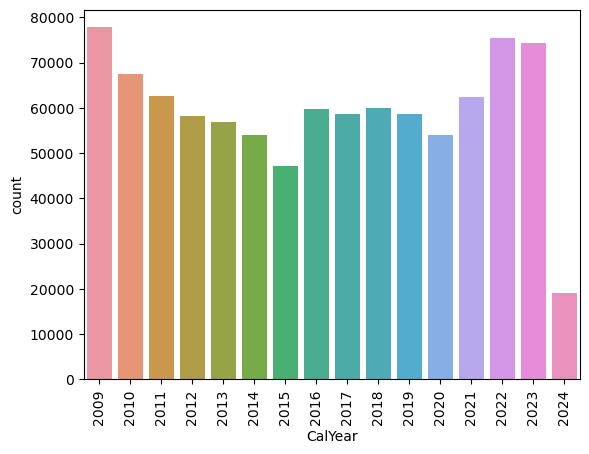

**TimeOfCall---------------------------------------- ['00:03:00' '00:04:27' '00:12:31' ... '7:10:07' '2:43:14' '4:35:38']**

TimeOfCall
14:36:48    0.000038
16:05:00    0.000034
19:11:16    0.000034
18:10:37    0.000033
11:04:19    0.000033
              ...   
05:19:32    0.000001
5:26:19     0.000001
5:26:47     0.000001
0:02:20     0.000001
4:35:38     0.000001
Name: proportion, Length: 118201, dtype: float64

**HourOfCall---------------------------------------- [0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]**

HourOfCall
18    0.060054
17    0.058989
19    0.057744
16    0.057075
15    0.056381
14    0.055622
13    0.054898
12    0.054080
20    0.053979
11    0.053042
10    0.049784
21    0.048433
9     0.045247
22    0.042949
8     0.037708
23    0.037065
0     0.031554
7     0.027905
1     0.025748
2     0.021202
6     0.019084
3     0.018715
4     0.016579
5     0.016163
Name: proportion, dtype: float64

g:\Anaconda\envs\Jan24_cds_Pompiers\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


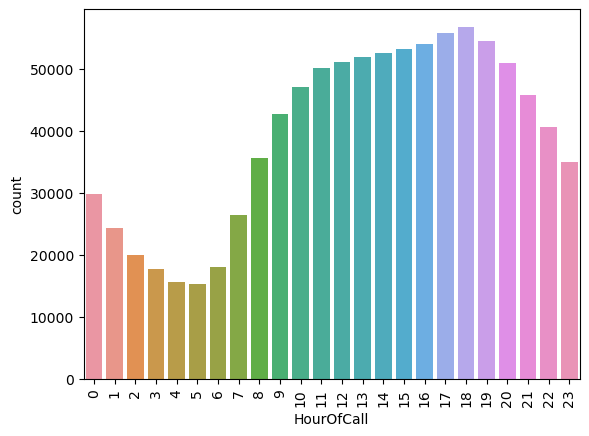

**IncidentGroup------------------------------------- ['Fire' 'Special Service' 'False Alarm']**

IncidentGroup
False Alarm        0.405835
Special Service    0.403991
Fire               0.190174
Name: proportion, dtype: float64

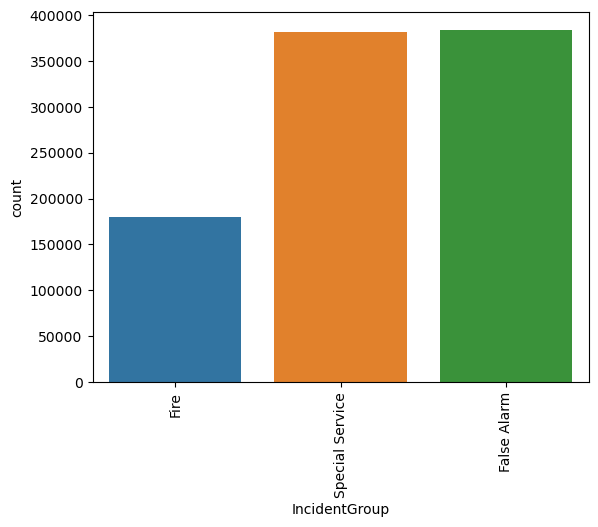

**StopCodeDescription------------------------------- ['Secondary Fire' 'Special Service' 'AFA' 'False alarm - Good intent'
 'Primary Fire' 'Chimney Fire' 'False alarm - Malicious' 'Late Call'
 'Use of Special Operations Room']**

StopCodeDescription
Special Service                   0.403981
AFA                               0.316543
Secondary Fire                    0.130607
False alarm - Good intent         0.079527
Primary Fire                      0.059073
False alarm - Malicious           0.009765
Chimney Fire                      0.000317
Late Call                         0.000178
Use of Special Operations Room    0.000010
Name: proportion, dtype: float64

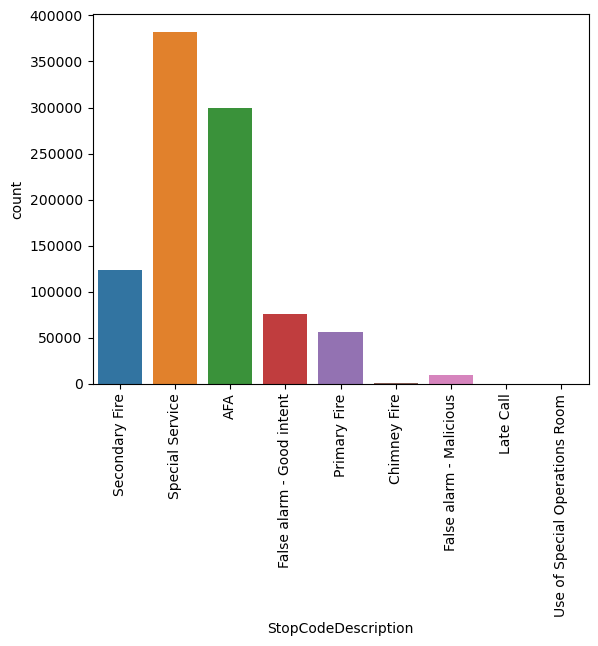

**PropertyCategory---------------------------------- ['Outdoor' 'Road Vehicle' 'Outdoor Structure' 'Other Residential'
 'Dwelling' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat']**

PropertyCategory
Dwelling             0.381855
Non Residential      0.299123
Outdoor              0.116150
Road Vehicle         0.088072
Outdoor Structure    0.080847
Other Residential    0.033375
Rail Vehicle         0.000268
Aircraft             0.000154
Boat                 0.000154
Name: proportion, dtype: float64

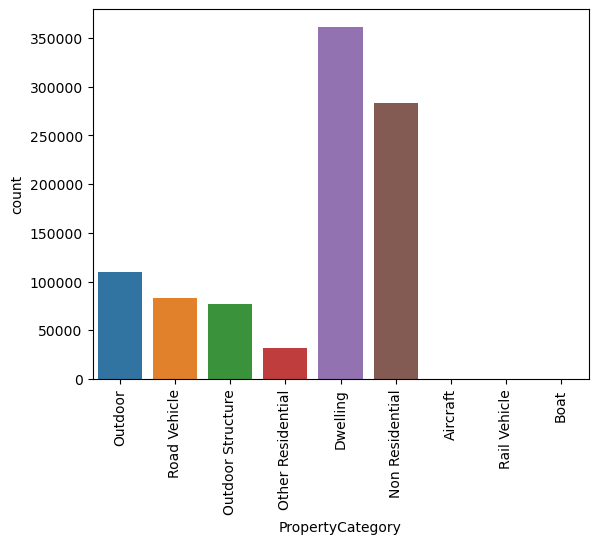

**AddressQualifier---------------------------------- ['In street outside gazetteer location' 'On land associated with building'
 'On motorway / elevated road' 'Correct incident location'
 'In street remote from gazetteer location' 'Within same building'
 'In street close to gazetteer location'
 'Open land/water - nearest gazetteer location'
 'Nearby address - street not listed in gazetteer'
 'Nearby address - no building in street' 'Railway land or rolling stock']**

AddressQualifier
Correct incident location                          0.530690
Within same building                               0.183861
In street outside gazetteer location               0.097270
On land associated with building                   0.070457
In street close to gazetteer location              0.057406
Open land/water - nearest gazetteer location       0.038863
Nearby address - street not listed in gazetteer    0.007025
In street remote from gazetteer location           0.005646
Nearby address - no building in street             0.004977
On motorway / elevated road                        0.002842
Railway land or rolling stock                      0.000964
Name: proportion, dtype: float64

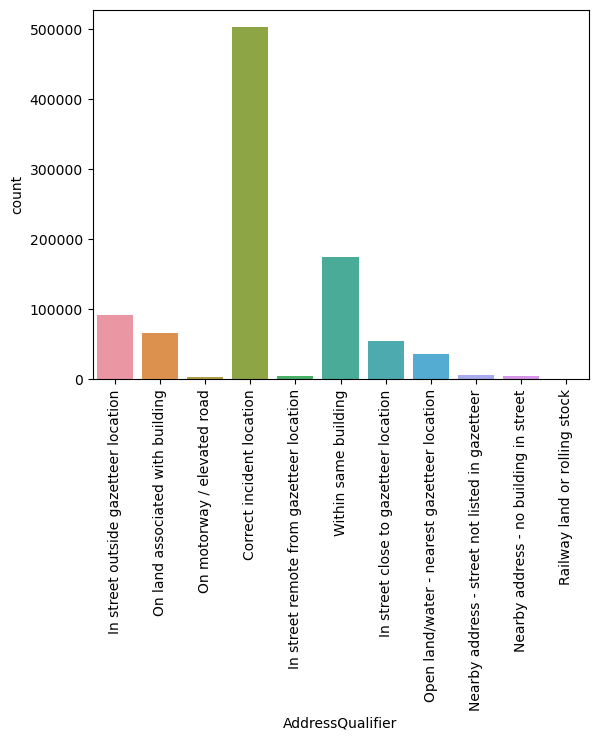

**Postcode_district--------------------------------- ['N9' 'UB10' 'SE3' 'EC1V' 'WC1B' 'SE5' 'TW3' 'E8' 'EN2' 'EC1A' 'SE26'
 'CR4' 'NW5' 'WC2R' 'N1' 'SE17' 'EC4A' 'SE1' 'SW16' 'IG6' 'E3' 'SE8'
 'WC2N' 'SE18' 'CR9' 'TW11' 'E9' 'N12' 'N6' 'DA5' 'EC1M' 'WC1H' 'SW20'
 'N7' 'NW2' 'SE9' 'RM8' 'E1' 'SE20' 'CR0' 'N3' 'SE19' 'W9' 'UB3' 'SW11'
 'EN1' 'SE25' 'TW1' 'W14' 'IG11' 'W1H' 'NW3' 'EN3' 'SE23' 'SW2' 'RM3'
 'HA6' 'E2' 'CR2' 'E18' 'KT6' 'E10' 'SW15' 'RM10' 'UB6' 'N13' 'W6' 'TW6'
 'UB5' 'UB4' 'W12' 'SW13' 'E14' 'W1J' 'RM1' 'KT2' 'BR5' 'WC1V' 'HA9'
 'SW19' 'W1C' 'SM4' 'EC2A' 'W2' 'SM2' 'SE15' 'RM14' 'SE16' 'N15' 'E16'
 'SW3' 'BR3' 'WC2H' 'TW4' 'WC1N' 'IG7' 'SE22' 'SE21' 'N11' 'SE13' 'N17'
 'E6' 'N4' 'TW14' 'W10' 'E7' 'NW10' 'SE27' 'SE14' 'SW18' 'N22' 'NW9'
 'SW12' 'DA8' 'NW1' 'E5' 'RM7' 'SW1P' 'SW6' 'E17' 'SE2' 'E11' 'E15' 'N16'
 'W15' 'HA8' 'SW1V' 'HA1' 'W11' 'UB1' 'KT1' 'IG1' 'UB2' 'N19' 'IG8' 'SW5'
 'SW1A' 'E1W' 'EC3A' 'E4' 'NW6' 'N10' 'WC2E' 'W3' 'HA3' 'IG3' 'HA5' 'E13'
 'SW9' 'SW17' 'SW1W' 'UB9' 'UB8' 'SW4' 'DA6' 'W4' 'SE11' 'W1T' 'NW7'
 'RM11' 'EC1N' 'HA7' 'N18' 'SE4' 'RM12' 'SW1X' 'SM5' 'DA18' 'TW8' 'NW8'
 'BR4' 'SE24' 'CR5' 'HA0' 'BR2' 'EC2V' 'SE10' 'W5' 'DA14' 'HA2' 'TW13'
 'SW8' 'TW2' 'N8' 'RM9' 'W8' 'SE7' 'UB7' 'WC2B' 'N2' 'CR7' 'EC3R' 'SW1Y'
 'EN5' 'TN16' 'RM13' 'SM1' 'SW7' 'SE12' 'W1D' 'SE28' 'W1G' 'W1K' 'N20'
 'SM6' 'DA15' 'TW5' 'SE6' 'NW4' 'W1X' 'W1U' 'DA1' 'TW7' 'RM4' 'CR8' 'HA4'
 'KT5' 'DA16' 'N14' 'DA17' 'BR1' 'WC1E' 'EC1R' 'BR6' 'IG4' 'EC1Y' 'W1S'
 'EC3V' 'SM3' 'WC2A' 'W13' 'W1W' 'SW1H' 'SW10' 'WC1X' 'W7' 'N5' 'KT3'
 'SW1E' 'EC3N' 'DA7' 'EC4Y' 'W1F' 'TW10' 'EC4R' 'TW9' 'EC2N' 'KT4' 'TW12'
 'SW14' 'E12' 'IG2' 'EN4' 'EC2R' 'NW11' 'N21' 'KT9' 'EC4M' 'EC4N' 'BR7'
 'EC2Y' 'UB11' 'EC4V' 'EC3M' 'WC1R' 'IG5' 'W1B' 'EC2M' 'RM6' 'RM2' 'KT8'
 'WC1A' 'WC14' 'EN7' 'W1A' 'RM5' 'W1V' 'EN8' 'TW15' 'EC2P' 'WD3' 'TN14'
 'EC3P' 'CR3' 'TW19' 'W1N' 'WC2' 'BR8' 'EN6' 'CM13' 'EC1' 'CR6' 'W17'
 'E4A' 'KT17' 'IG9' 'SM7' 'N1C' 'EC17' 'CM14' 'SW99' 'RM15' 'E98' 'W1M'
 'KT18' 'W1' 'EC2' 'E20' 'WD23' 'W1P' 'WD6' 'CR44' 'KT19' 'SE1P' 'KT22'
 'SL3' 'SL0' 'EN9' 'TW16' 'RM19' 'BF1']**

Postcode_district
CR0     0.020278
SE1     0.016540
E1      0.014924
E14     0.014156
NW1     0.013573
          ...   
W1P     0.000001
W1N     0.000001
CR44    0.000001
WC14    0.000001
EC17    0.000001
Name: proportion, Length: 321, dtype: float64

**IncGeo_BoroughName-------------------------------- ['ENFIELD' 'HILLINGDON' 'GREENWICH' 'ISLINGTON' 'CAMDEN' 'SOUTHWARK'
 'HOUNSLOW' 'HACKNEY' 'CITY OF LONDON' 'BROMLEY' 'MERTON' 'LAMBETH'
 'REDBRIDGE' 'TOWER HAMLETS' 'LEWISHAM' 'WESTMINSTER' 'CROYDON'
 'RICHMOND UPON THAMES' 'BARNET' 'HARINGEY' 'BEXLEY' 'BRENT'
 'BARKING AND DAGENHAM' 'WANDSWORTH' 'HAMMERSMITH AND FULHAM' 'HAVERING'
 'KINGSTON UPON THAMES' 'WALTHAM FOREST' 'EALING' 'SUTTON' 'NEWHAM'
 'KENSINGTON AND CHELSEA' 'HARROW']**

IncGeo_BoroughName
WESTMINSTER               0.077940
CAMDEN                    0.046269
TOWER HAMLETS             0.045217
SOUTHWARK                 0.043226
LAMBETH                   0.039439
CROYDON                   0.038560
NEWHAM                    0.035279
HACKNEY                   0.035136
HILLINGDON                0.033895
EALING                    0.033699
LEWISHAM                  0.033329
ENFIELD                   0.032972
BARNET                    0.032685
ISLINGTON                 0.032190
GREENWICH                 0.030965
BROMLEY                   0.030372
BRENT                     0.029491
WANDSWORTH                0.027838
KENSINGTON AND CHELSEA    0.027831
WALTHAM FOREST            0.027641
HOUNSLOW                  0.026819
HARINGEY                  0.026339
HAMMERSMITH AND FULHAM    0.024437
REDBRIDGE                 0.023261
HAVERING                  0.023090
BEXLEY                    0.021664
BARKING AND DAGENHAM      0.021397
MERTON                    0.018480
H

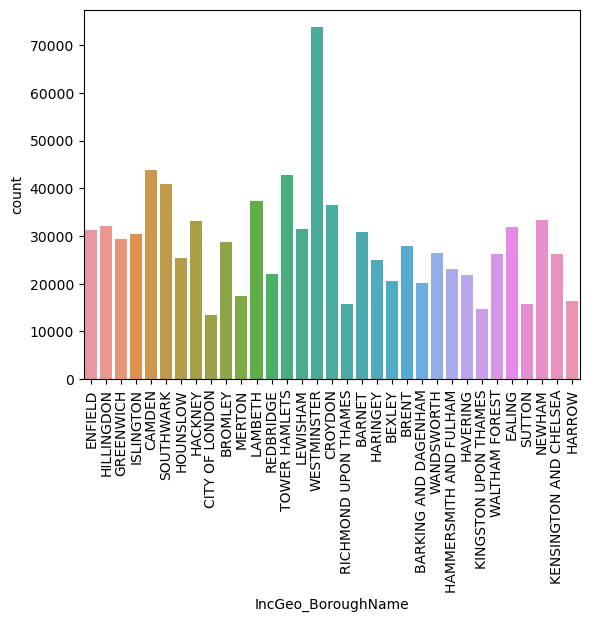

**IncGeo_WardNameNew-------------------------------- ['Haselbury' 'Hillingdon East' 'Kidbrooke Village & Sutcliffe' ...
 'WEALDSTONE NORTH' 'WORCESTER PARK SOUTH' 'GREEN LANE & ST. JAMES']**

IncGeo_WardNameNew
West End                   0.021539
St. James's                0.015431
Bloomsbury                 0.007931
Heathrow Villages          0.007014
Holborn & Covent Garden    0.006847
                             ...   
THURLOW PARK               0.000001
Chase                      0.000001
Plumstead                  0.000001
FULHAM BROADWAY            0.000001
BEDDINGTON SOUTH           0.000001
Name: proportion, Length: 1469, dtype: float64

**Resource_Code------------------------------------- ['A341' 'G232' 'E231' 'A271' 'A231' 'E372' 'G392' 'F282' 'A352' 'A281'
 'E431' 'H361' 'A432' 'A242' 'E352' 'E331' 'H352' 'F371' 'F222' 'E221'
 'A301' 'H312' 'H322' 'H412' 'A371' 'E361' 'A322' 'E281' 'H401' 'A312'
 'A411' 'E401' 'F412' 'F261' 'H262' 'A401' 'A211' 'G402' 'H271' 'H431'
 'G362' 'F441' 'A421' 'A351' 'E381' 'H252' 'F382' 'G321' 'F242' 'E301'
 'G561' 'F351' 'H391' 'F292' 'H332' 'G312' 'A342' 'G361' 'F241' 'G242'
 'G241' 'A241' 'F381' 'A412' 'E411' 'H331' 'G291' 'F391' 'A212' 'H381'
 'F431' 'E341' 'A332' 'F452' 'G341' 'H241' 'F231' 'E291' 'H382' 'H281'
 'G272' 'E211' 'F212' 'F461' 'F221' 'F332' 'G221' 'E272' 'H251' 'F322'
 'F411' 'A251' 'A302' 'G351' 'F251' 'F302' 'A381' 'H221' 'G211' 'A391'
 'H212' 'G281' 'F432' 'H411' 'F422' 'G331' 'A331' 'H421' 'G302' 'F342'
 'G261' 'F361' 'H341' 'A261' 'H222' 'F331' 'G231' 'F312' 'A431' 'E241'
 'H211' 'F272' 'E271' 'E351' 'G371' 'A392' 'E222' 'G282' 'H371' 'F421'
 'H291' 'E392' 'G252' 'G391' 'G271' 'E312' 'F281' 'G342' 'H321' 'H242'
 'E421' 'F401' 'G301' 'E251' 'A311' 'G382' 'H261' 'E252' 'A321' 'G381'
 'F311' 'F211' 'H311' 'F301' 'F271' 'E321' 'A361' 'F451' 'G311' 'F341'
 'H351' 'E371' 'E311' 'G251' 'F321' 'F291' 'E391' 'G401' 'E402' 'F571'
 'F362' 'OV51' 'OV01' 'H432' 'E412' 'A402' 'G222' 'E232' 'C121' 'C81'
 'C101' 'C92' 'C82' 'C11' 'C42' 'C72' 'C52']**

Resource_Code
A242    0.028830
A231    0.020988
A281    0.013174
A241    0.013153
F241    0.013035
          ...   
C121    0.000001
C92     0.000001
C101    0.000001
C81     0.000001
C52     0.000001
Name: proportion, Length: 187, dtype: float64

**PerformanceReporting------------------------------ ['1' '2']**

PerformanceReporting
1    0.999999
2    0.000001
Name: proportion, dtype: float64

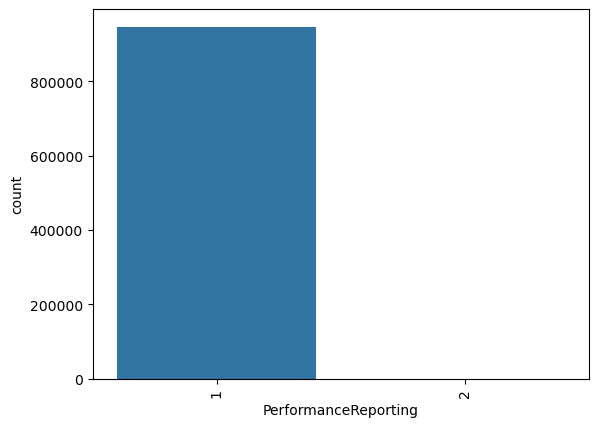

**DateAndTimeMobilised------------------------------ <DatetimeArray>
['2009-01-01 00:04:00', '2009-01-01 00:13:00', '2009-01-01 00:15:00',
 '2009-01-01 00:18:00', '2009-01-01 00:19:00', '2009-01-01 00:23:00',
 '2009-01-01 00:24:00', '2009-01-01 00:25:00', '2009-01-01 00:31:00',
 '2009-01-01 00:34:00',
 ...
 '2024-03-30 23:18:00', '2024-03-30 23:16:00', '2024-03-30 23:36:00',
 '2024-03-30 23:40:00', '2024-03-30 23:43:00', '2024-03-30 23:45:00',
 '2024-03-30 23:46:00', '2024-03-30 23:49:00', '2024-03-30 23:50:00',
 '2024-03-30 23:54:00']
Length: 882975, dtype: datetime64[ns]**

DateAndTimeMobilised
2024-01-01 00:44:00    0.000006
2009-11-05 22:27:00    0.000005
2013-10-28 07:26:00    0.000005
2022-08-06 17:56:00    0.000005
2014-11-05 21:30:00    0.000005
                         ...   
2014-02-11 08:50:00    0.000001
2014-02-11 08:54:00    0.000001
2014-02-11 08:57:00    0.000001
2014-02-11 09:09:00    0.000001
2024-03-30 23:54:00    0.000001
Name: proportion, Length: 882975, dtype: float64

**DateAndTimeArrived-------------------------------- <DatetimeArray>
['2009-01-01 00:09:00', '2009-01-01 00:08:00', '2009-01-01 00:22:00',
 '2009-01-01 00:19:00', '2009-01-01 00:20:00', '2009-01-01 00:29:00',
 '2009-01-01 00:24:00', '2009-01-01 00:28:00', '2009-01-01 00:35:00',
 '2009-01-01 00:36:00',
 ...
 '2024-03-30 23:26:00', '2024-03-30 23:39:00', '2024-03-30 23:40:00',
 '2024-03-30 23:44:00', '2024-03-30 23:46:00', '2024-03-30 23:49:00',
 '2024-03-30 23:50:00', '2024-03-30 23:52:00', '2024-03-31 00:00:00',
 '2024-03-31 00:04:00']
Length: 881374, dtype: datetime64[ns]**

DateAndTimeArrived
2024-01-01 00:56:00    0.000006
2024-01-02 16:59:00    0.000006
2013-11-09 12:25:00    0.000005
2022-02-27 18:38:00    0.000005
2024-01-02 15:55:00    0.000005
                         ...   
2014-02-16 07:29:00    0.000001
2014-02-16 07:53:00    0.000001
2014-02-16 08:19:00    0.000001
2014-02-16 08:23:00    0.000001
2024-03-31 00:04:00    0.000001
Name: proportion, Length: 881374, dtype: float64

**DeployedFromStation_Name-------------------------- ['Edmonton' 'Hillingdon' 'East Greenwich' 'Clerkenwell' 'Euston' 'Peckham'
 'Feltham' 'Homerton' 'Enfield' 'Dowgate' 'Beckenham' 'Mitcham'
 'Kentish Town' 'Soho' 'Old Kent Road' 'Southwark' 'Tooting' 'Hainault'
 'Poplar' 'Greenwich' 'Islington' 'Croydon' 'Norbury' 'Kingston' 'Barnet'
 'Deptford' 'Hornsey' 'Bexley' 'New Malden' 'Holloway' 'West Hampstead'
 'Sidcup' 'Dagenham' 'Bethnal Green' 'Addington' 'Hendon' 'Paddington'
 'Hayes' 'Battersea' 'Twickenham' 'Hammersmith' 'East Ham' 'Belsize'
 'New Cross' 'West Norwood' 'Romford' 'Ruislip' 'Shoreditch' 'Eltham'
 'Heathrow' 'Woodford' 'Surbiton' 'Leyton' 'Wandsworth' 'Northolt'
 'Southall' 'Orpington' 'Park Royal' 'Hornchurch' 'Wimbledon' 'Sutton'
 'Barking' 'Dockhead' 'Tottenham' 'Plaistow' 'Chelsea' 'Brixton'
 'Millwall' 'Lee Green' 'Woodside' 'North Kensington' 'Lewisham'
 'Stratford' 'Silvertown' 'Whitechapel' 'Stanmore' 'Erith'
 'Stoke Newington' 'Westminster' 'Fulham' 'Shadwell' 'Leytonstone'
 'Mill Hill' 'Lambeth' 'Harrow' 'Finchley' 'Clapham' 'Willesden' 'Ilford'
 'Kensington' 'Richmond' 'Wembley' 'Chingford' 'Acton' 'Walthamstow'
 'Kingsland' 'Bow' 'Knightsbridge' 'Chiswick' 'Wallington' 'Woolwich'
 'Purley' 'Bromley' 'Ealing' 'Forest Hill' 'Biggin Hill' 'Wennington'
 'Plumstead' 'Heston' 'Downham' 'Southgate' 'Harold Hill' 'Dartford'
 'Hertfordshire' 'Buckinghamshire']**

DeployedFromStation_Name
Soho               0.042425
Euston             0.021806
Paddington         0.017434
Lambeth            0.016461
Shoreditch         0.016280
                     ...   
Biggin Hill        0.001644
Silvertown         0.001147
Dartford           0.000001
Hertfordshire      0.000001
Buckinghamshire    0.000001
Name: proportion, Length: 115, dtype: float64

**DeployedFromLocation------------------------------ [1, 0]
Categories (2, int64): [0, 1]**

DeployedFromLocation
1    0.964957
0    0.035043
Name: proportion, dtype: float64

g:\Anaconda\envs\Jan24_cds_Pompiers\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


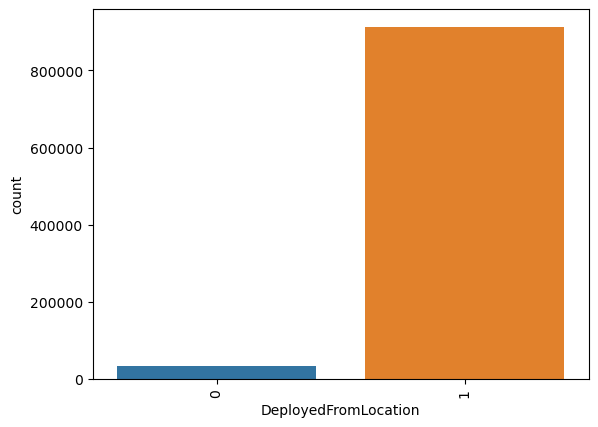

**PlusCode_Code------------------------------------- ['Initial' 'rca' 'add']**

PlusCode_Code
Initial    0.996335
rca        0.003410
add        0.000255
Name: proportion, dtype: float64

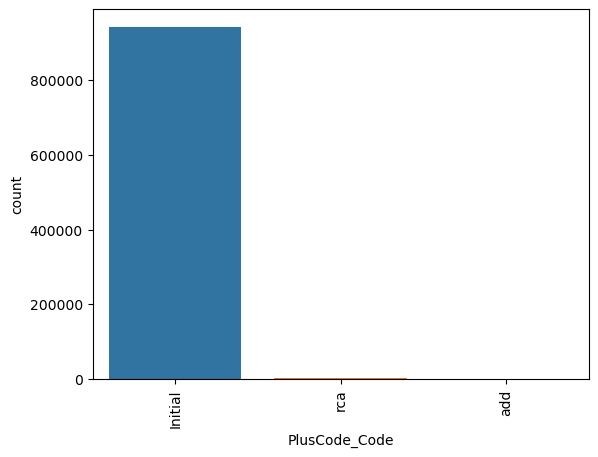

**PlusCode_Description------------------------------ ['Initial Mobilisation' 'Running call' 'Addition to first attendance']**

PlusCode_Description
Initial Mobilisation            0.996335
Running call                    0.003410
Addition to first attendance    0.000255
Name: proportion, dtype: float64

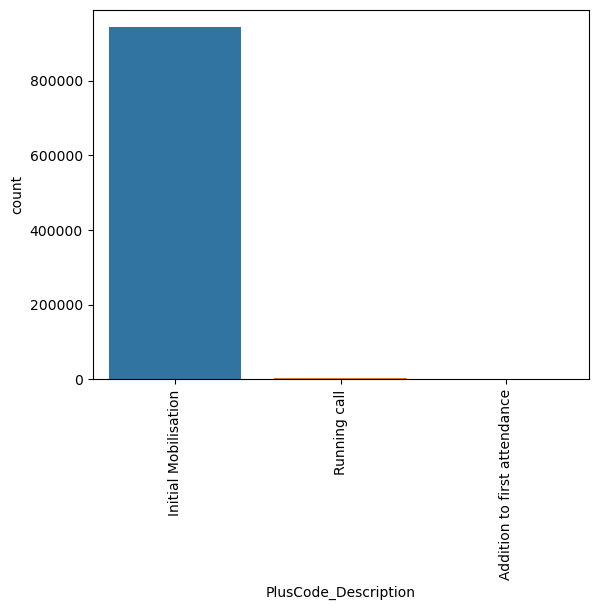

In [346]:
for col in categorical_features:
    printmd(f'**{col :-<50} {df[col].unique()}**')
    display(df[col].value_counts(normalize=True))
    if(df[col].nunique() <= 34):
        #plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=90)
        plt.show()

**Variable DateOfCall**

In [349]:
df.columns

Index(['IncidentNumber', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'AddressQualifier', 'Postcode_district', 'IncGeo_BoroughName',
       'IncGeo_WardNameNew', 'Latitude', 'Longitude',
       'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'NumCalls',
       'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobilised',
       'DateAndTimeArrived', 'DeployedFromStation_Name',
       'DeployedFromLocation', 'PumpOrder', 'PlusCode_Code',
       'PlusCode_Description', 'DateOfCall_In_Ceconds'],
      dtype='object')

**Variable TimeOfCall**

#### **2.2.3 Variables continues**

In [353]:
def analyse_variable_quantitative(variable, base):

    print()

    print("Statistiques de la variable: ",variable , end="\n\n")

    print(base[variable].describe(), end="\n\n")

    sns.boxplot(x=variable, data=base)

    plt.title(f'Distribution de {variable} \n', fontsize=20)

    plt.show()


Statistiques de la variable:  Latitude

count    946353.000000
mean         51.474216
std           1.317533
min           0.000000
25%          51.469245
50%          51.513295
75%          51.549609
max          51.691599
Name: Latitude, dtype: float64



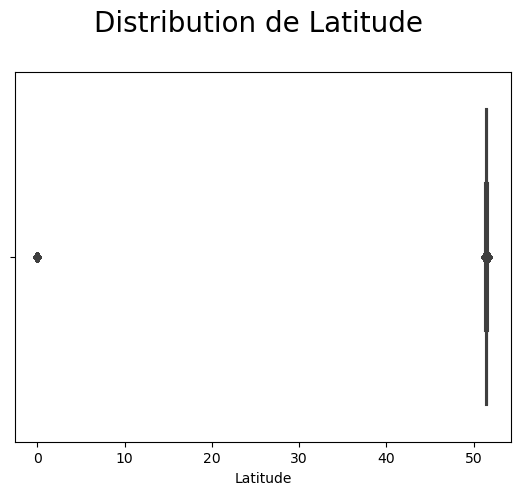


Statistiques de la variable:  Longitude

count    946353.000000
mean         -0.116580
std           0.143145
min          -0.510155
25%          -0.196113
50%          -0.113075
75%          -0.031690
max           0.322219
Name: Longitude, dtype: float64



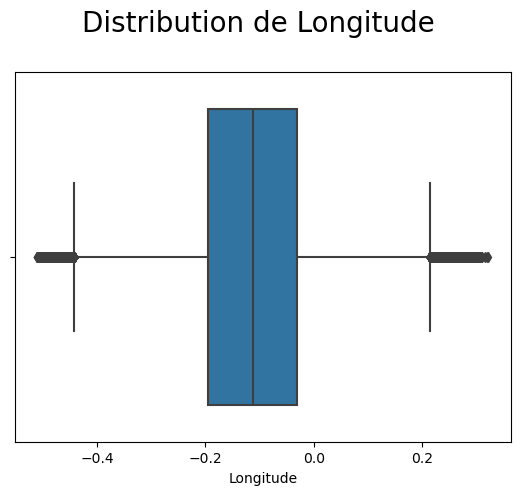


Statistiques de la variable:  FirstPumpArriving_AttendanceTime

count    946353.000000
mean        302.943172
std          95.978307
min          32.000000
25%         238.000000
50%         291.000000
75%         362.000000
max         550.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64



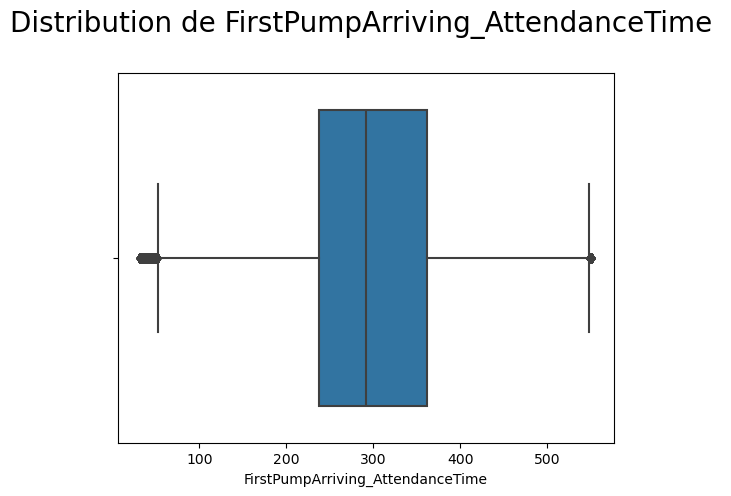


Statistiques de la variable:  NumStationsWithPumpsAttending

count    946353.000000
mean          1.051657
std           0.221334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: NumStationsWithPumpsAttending, dtype: float64



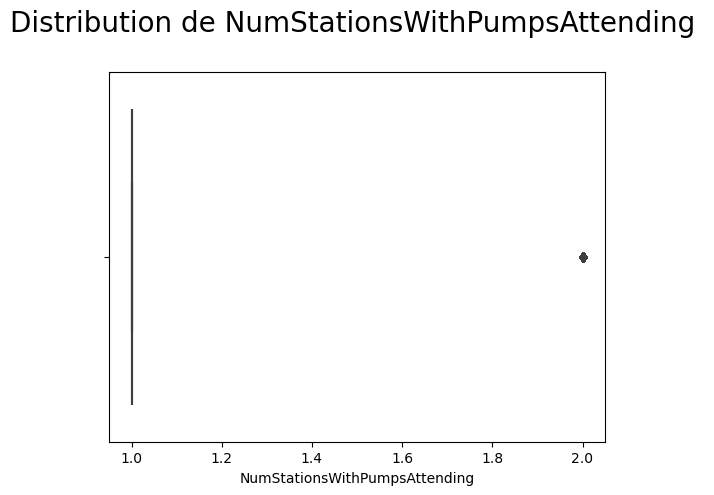


Statistiques de la variable:  NumPumpsAttending

count    946353.000000
mean          1.084957
std           0.322267
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: NumPumpsAttending, dtype: float64



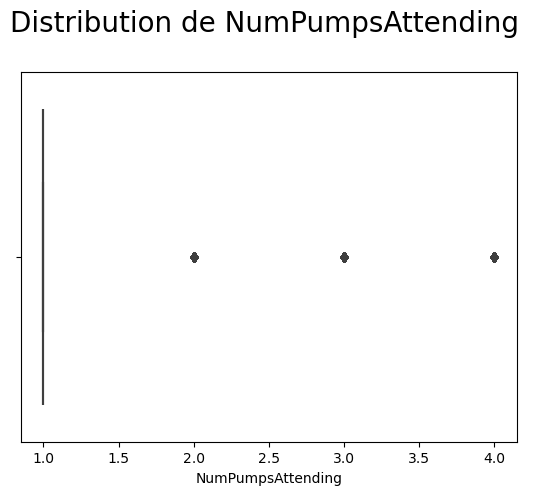


Statistiques de la variable:  PumpCount

count    946353.000000
mean          1.095545
std           0.354502
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: PumpCount, dtype: float64



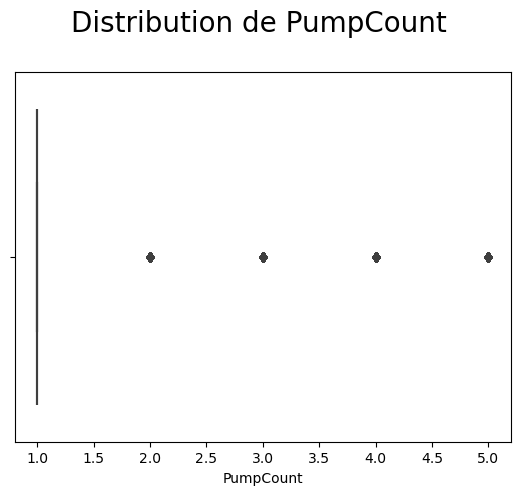


Statistiques de la variable:  PumpMinutesRounded

count    946353.000000
mean         63.532254
std          26.822331
min          60.000000
25%          60.000000
50%          60.000000
75%          60.000000
max         890.000000
Name: PumpMinutesRounded, dtype: float64



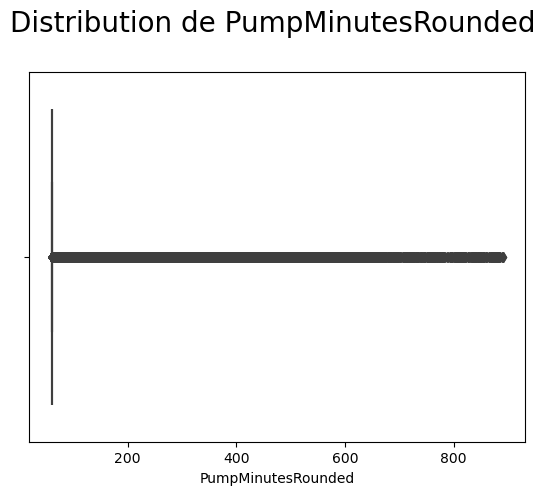


Statistiques de la variable:  NumCalls

count    946353.000000
mean          1.177984
std           0.479982
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: NumCalls, dtype: float64



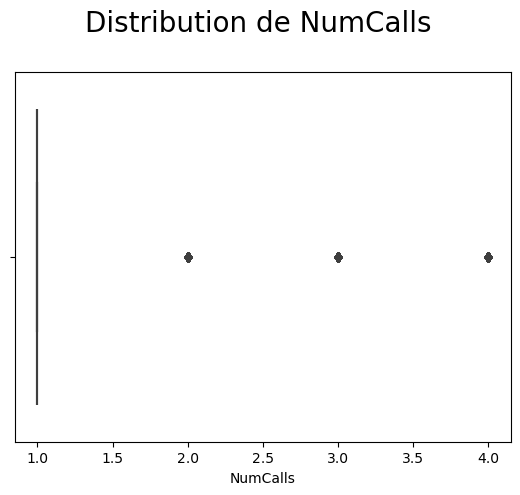


Statistiques de la variable:  PumpOrder

count    946353.000000
mean          1.000001
std           0.001028
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: PumpOrder, dtype: float64



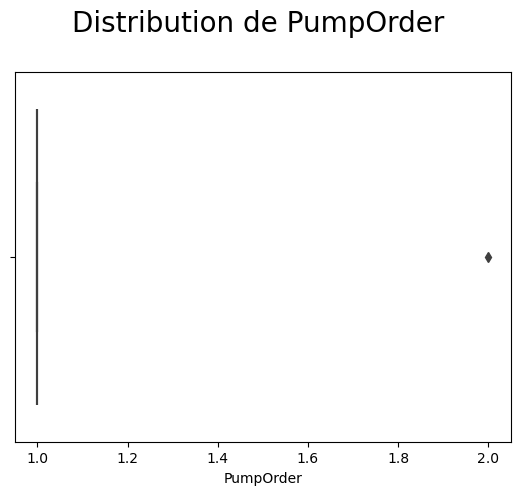


Statistiques de la variable:  DateOfCall_In_Ceconds

count    9.463530e+05
mean     1.473619e+18
std      1.463089e+17
min      1.230768e+18
25%      1.340928e+18
50%      1.477613e+18
75%      1.606090e+18
max      1.711757e+18
Name: DateOfCall_In_Ceconds, dtype: float64



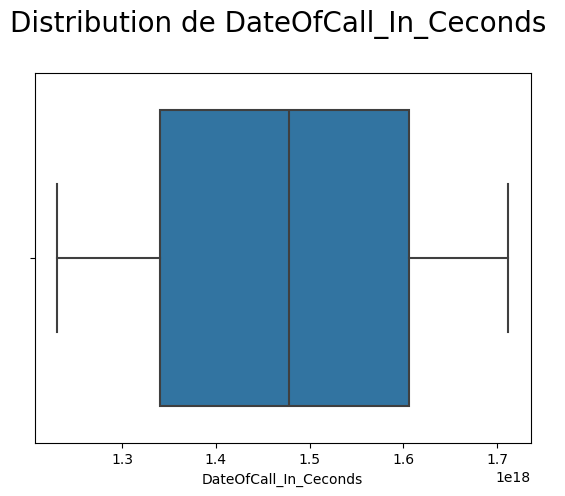

In [354]:
numeric_features = list(df.select_dtypes(include=[np.number]).columns)
for col in numeric_features:
    analyse_variable_quantitative(col, df)

#### **2.2.4 Check des outliers**

In [ ]:
def verfier_les_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()
    #display(summary)

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))
    #print(type(lower_bound))
    #print(upper_bound)

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()

    #print(f"Number of outliers:\n{num_outliers}")
    print(f"Number of outliers:\n{pd.concat([num_outliers,lower_bound,upper_bound],axis=1)}")

In [ ]:
verfier_les_outliers(incidents_df[numeric_features])

Number of outliers:
                                       0         1         2
CalYear                                0    2000.0    2032.0
HourOfCall                             0      -6.0      34.0
Easting_rounded                    51074  508750.0  552750.0
Northing_rounded                   19145  162650.0  198650.0
FirstPumpArriving_AttendanceTime   90853      36.5     568.5
NumStationsWithPumpsAttending      30135      -0.5       3.5
NumPumpsAttending                  49962      -0.5       3.5
PumpCount                          58222      -0.5       3.5
PumpMinutesRounded                210550      60.0      60.0
Notional Cost (£)                 109690     122.0     490.0
NumCalls                          293256       1.0       1.0


In [ ]:
outlier_columns = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls']

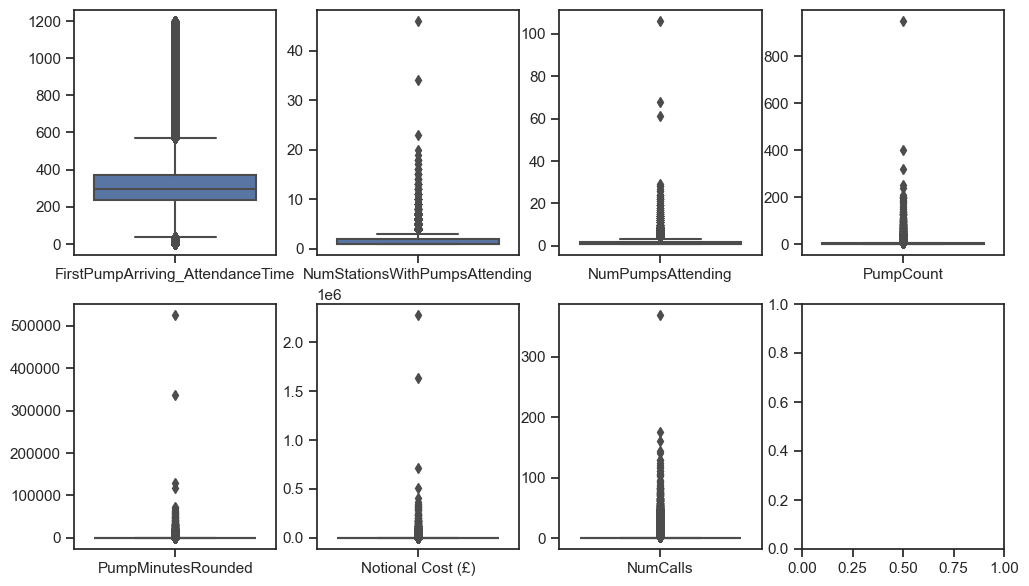

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(12,7))
row = col = 0
for index,col_name in enumerate(outlier_columns):
    if (index%4 == 0) & (index > 0):
        row += 1
        col = 0
    sns.boxplot(data=incidents_df[[col_name]], orient="x",ax=ax[row,col])
    col += 1

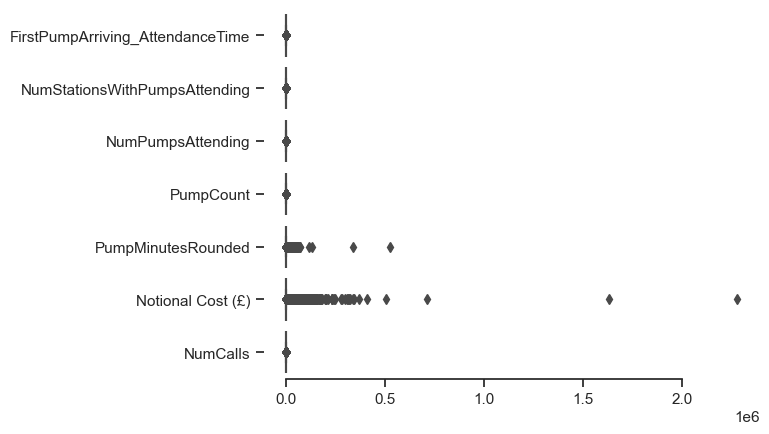

In [ ]:
#sns.set_theme(style="ticks")
ax = sns.boxplot(data=incidents_df[outlier_columns], orient="h")
sns.despine(trim=True, left=True)
plt.show()

#### **2.2.5 Supprimer les outliers**

**Questions  à poser, doute sur comment enlever les outliers **

- FirstPumpArriving_AttendanceTime
- PumpCount                          58222      -0.5       3.5
-PumpMinutesRounded                210550      60.0      60.0
- Notional Cost (£)                 109690     122.0     490.0
- NumCalls                          293256       1.0       1.0

In [ ]:
fpat_median =incidents_df['FirstPumpArriving_AttendanceTime'].median()
#incidents_df["FirstPumpArriving_AttendanceTime"] = np.where((incidents_df['FirstPumpArriving_AttendanceTime'] > 567) | (incidents_df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median,incidents_df['Age'])
incidents_df["FirstPumpArriving_AttendanceTime"] = incidents_df["FirstPumpArriving_AttendanceTime"].mask((incidents_df['FirstPumpArriving_AttendanceTime'] > 567) | (incidents_df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median)

#### **2.2.5 Relations variables catégorielles/Target**

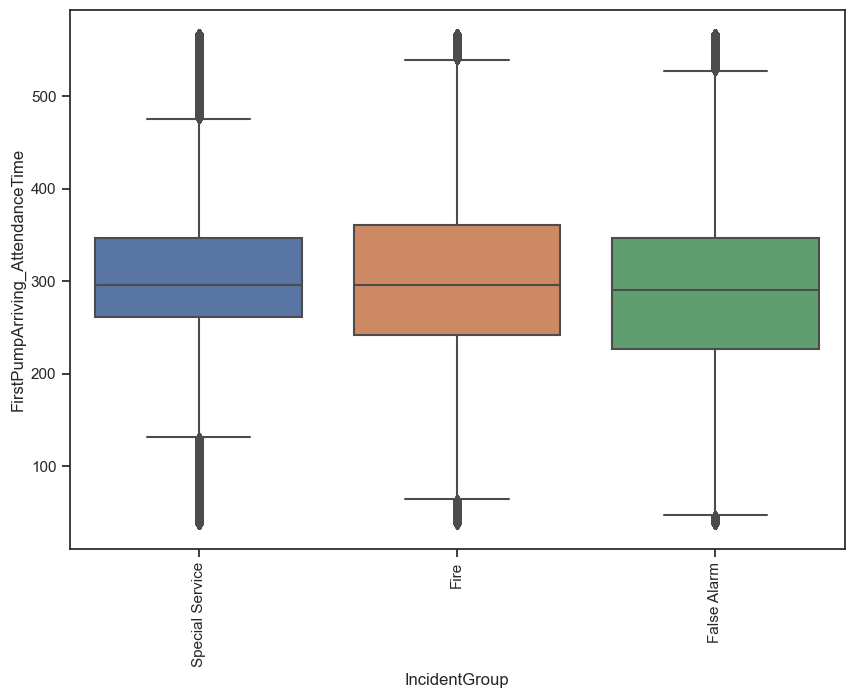

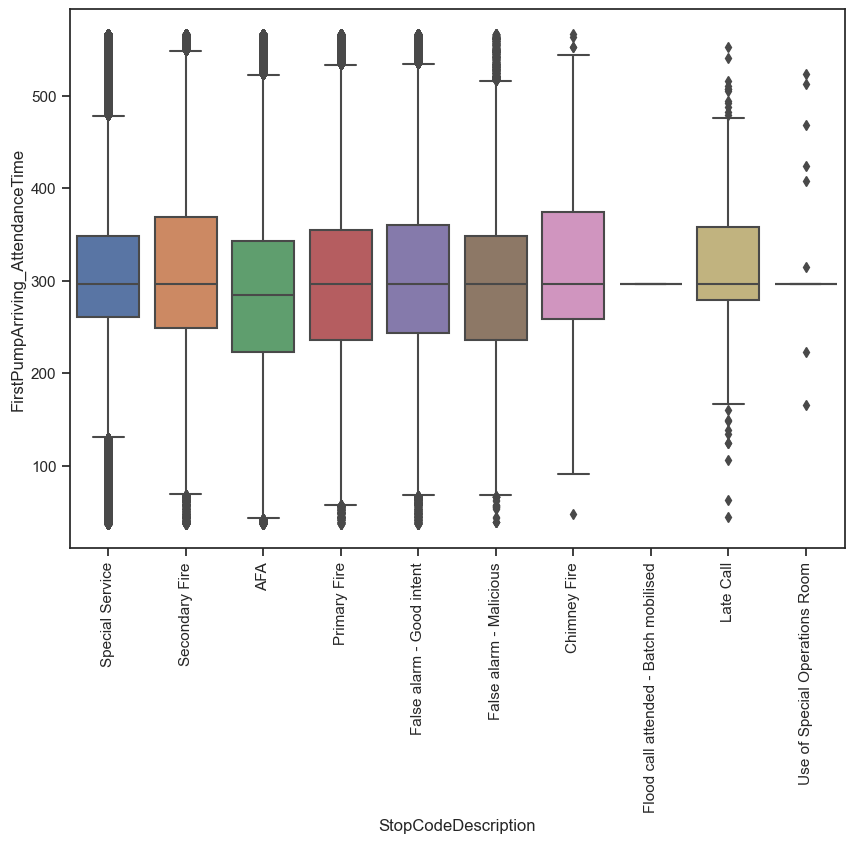

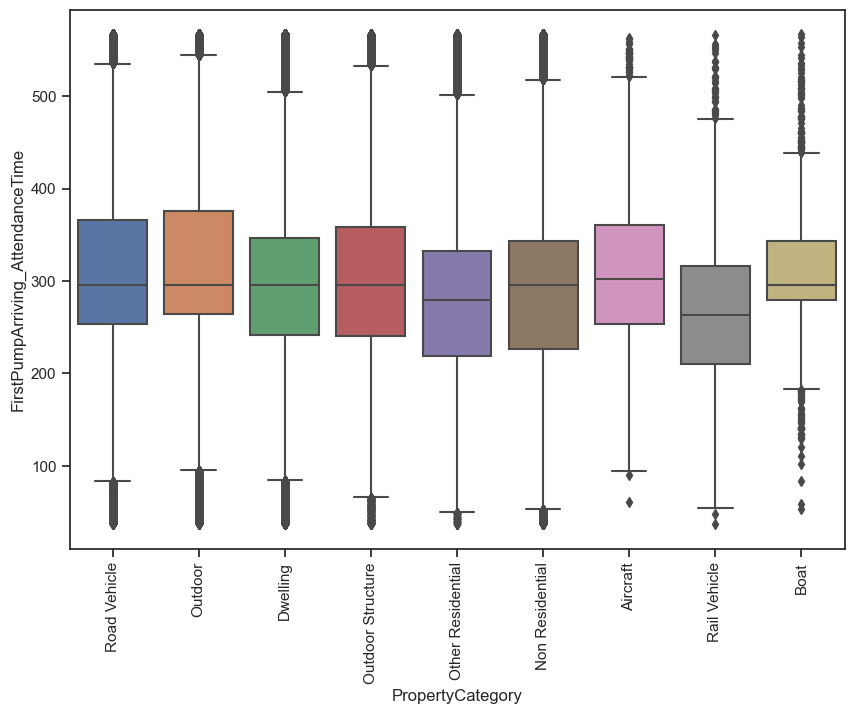

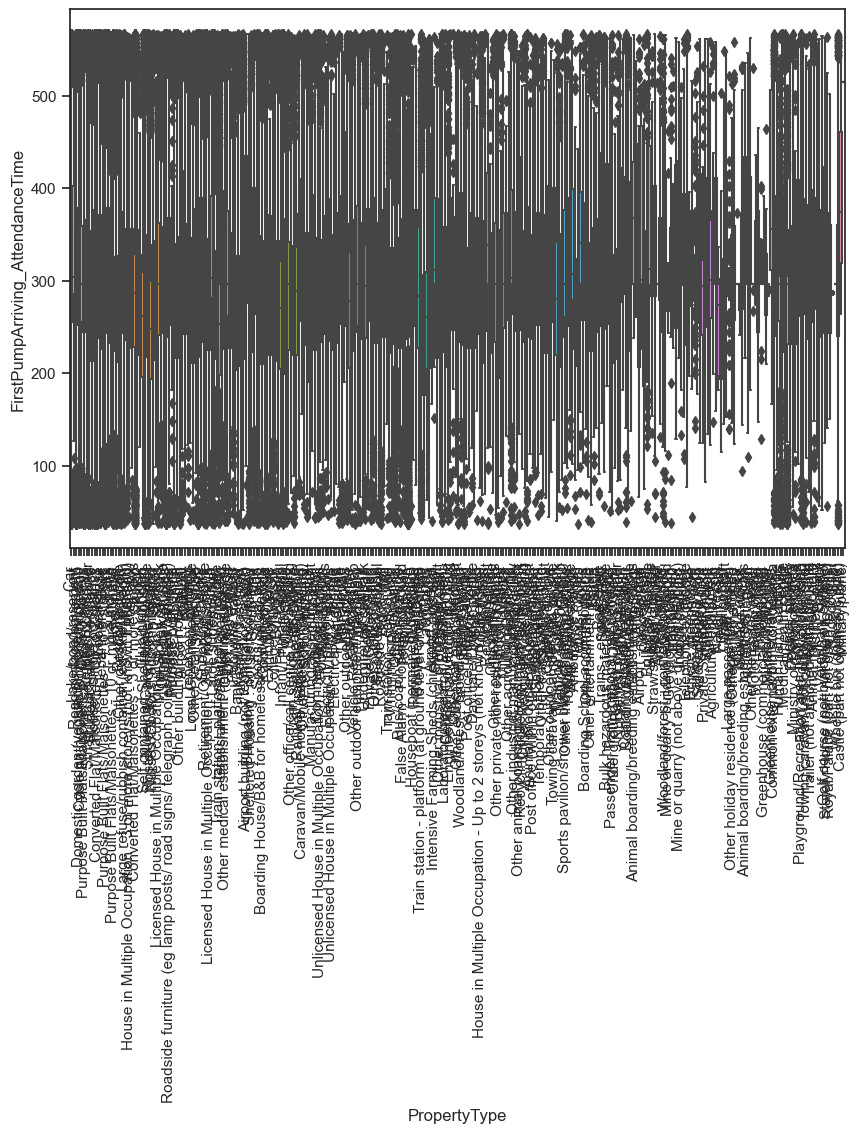

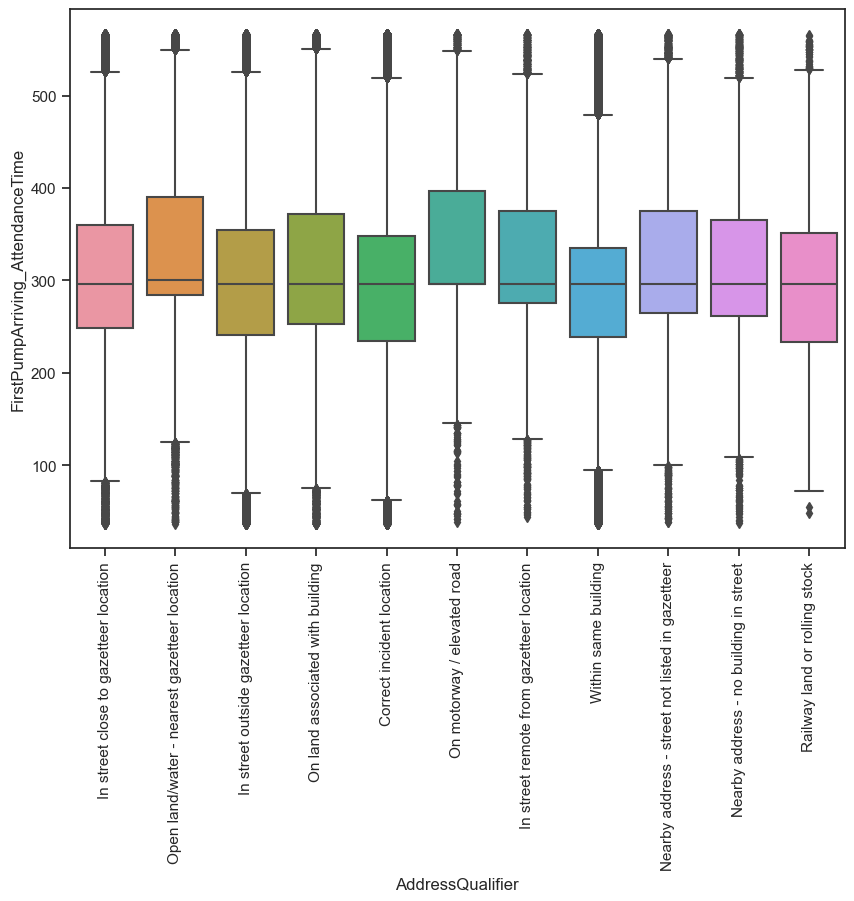

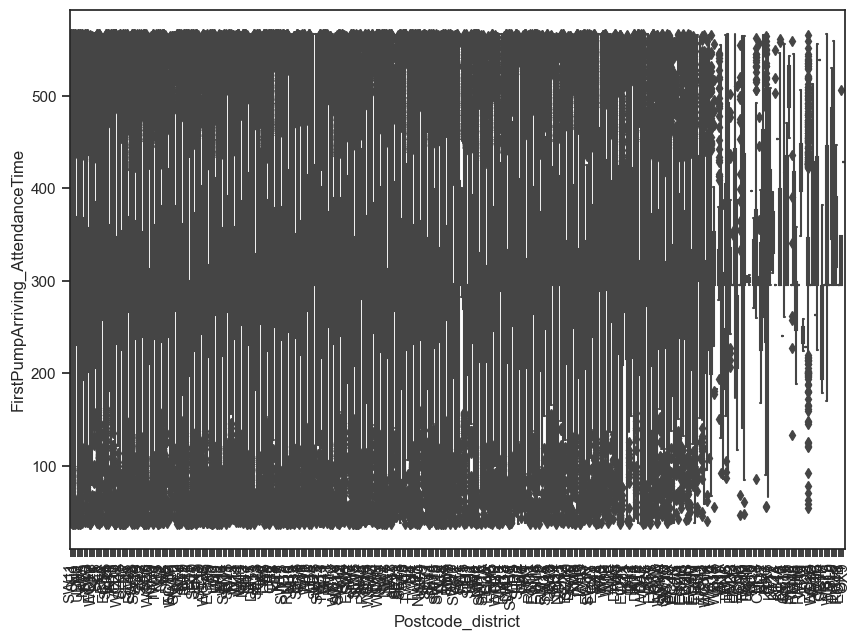

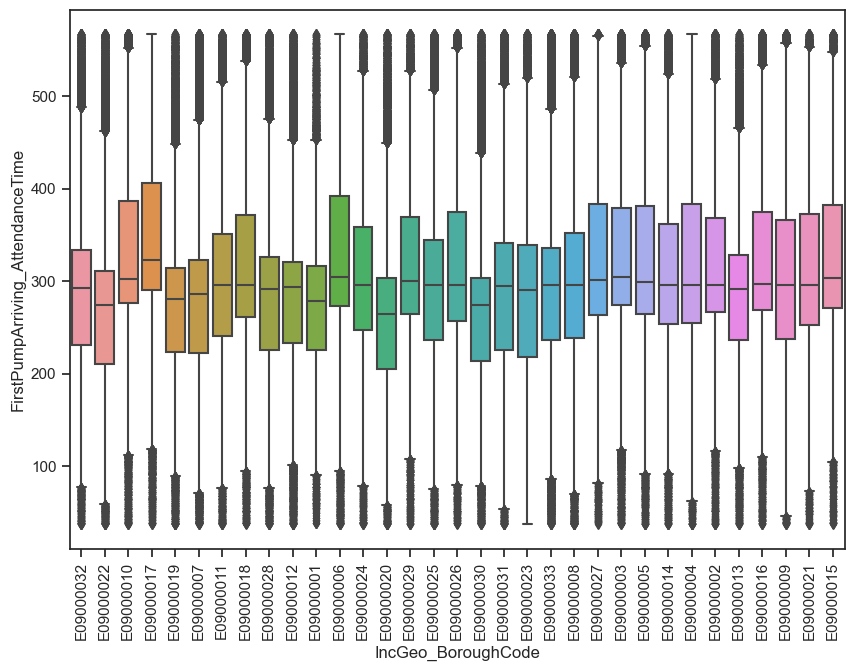

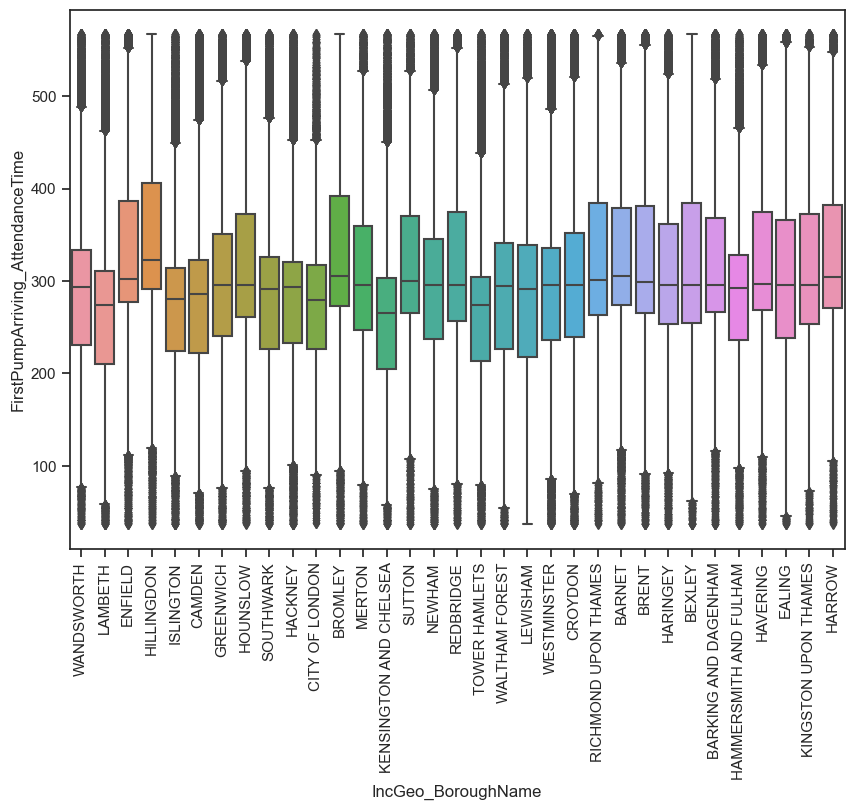

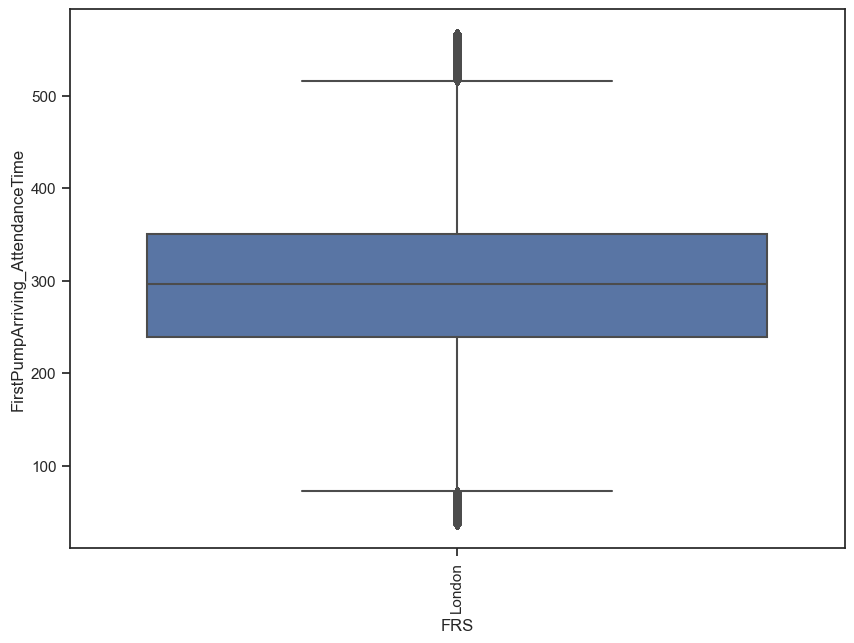

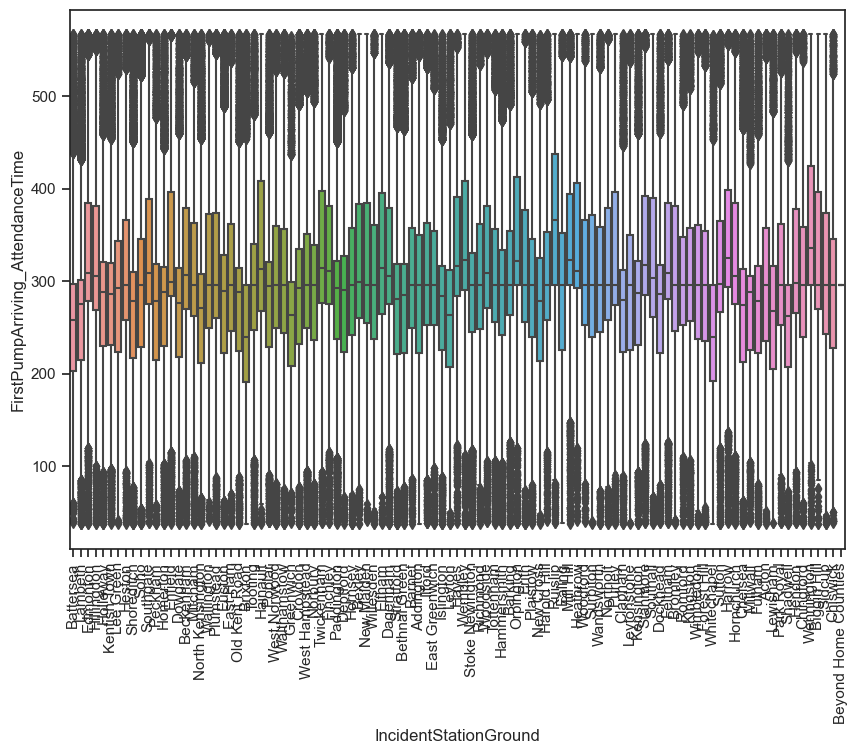

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(10,7))
    #sns.heatmap(pd.crosstab(incidents_df['FirstPumpArriving_AttendanceTime'], incidents_df[col]), annot=True, fmt='d')
    sns.boxplot(x=incidents_df[col],y=incidents_df['FirstPumpArriving_AttendanceTime'])
    plt.xticks(rotation=90)
    plt.show()

#### **2.2.6 Relations variables continues/Target**

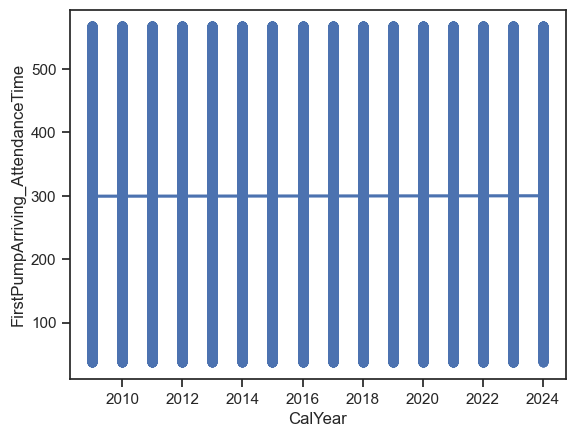

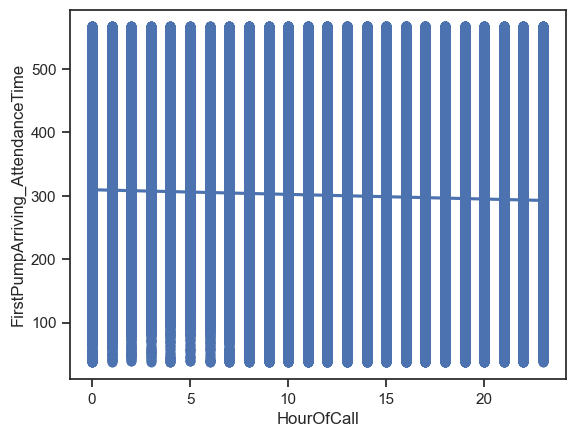

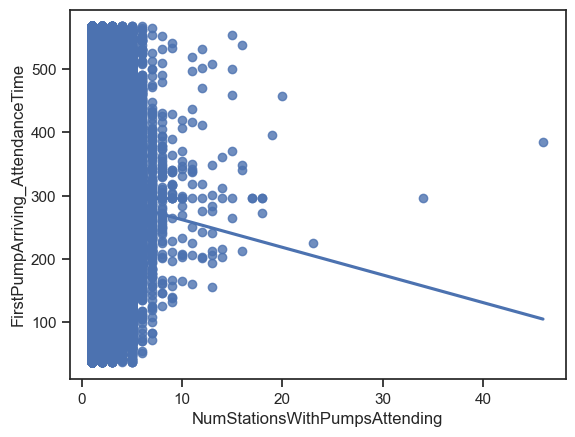

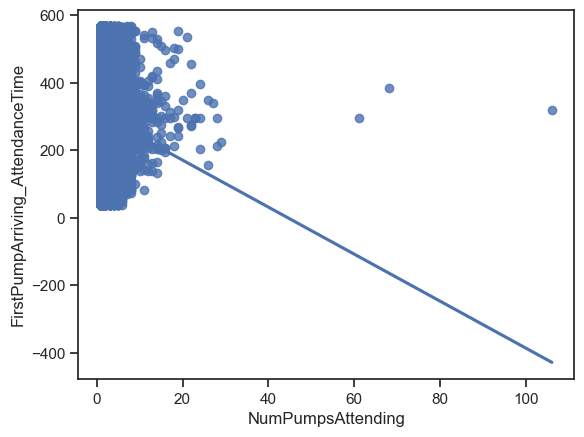

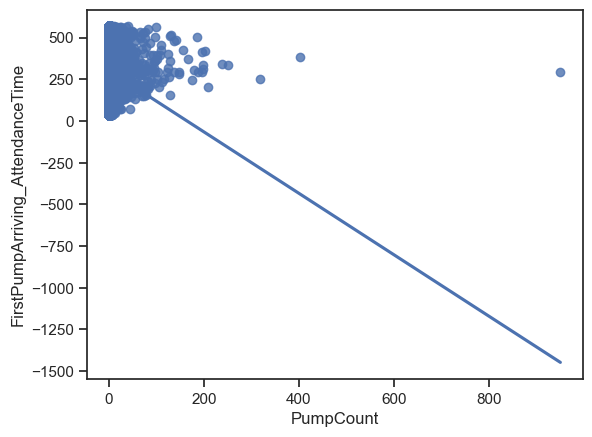

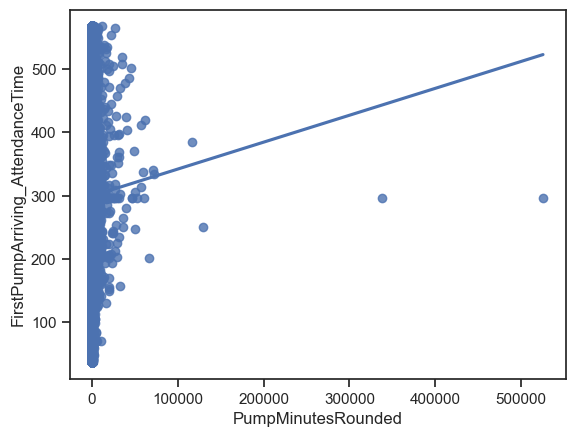

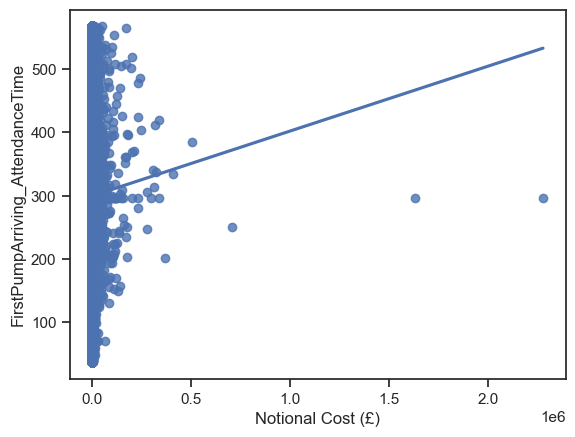

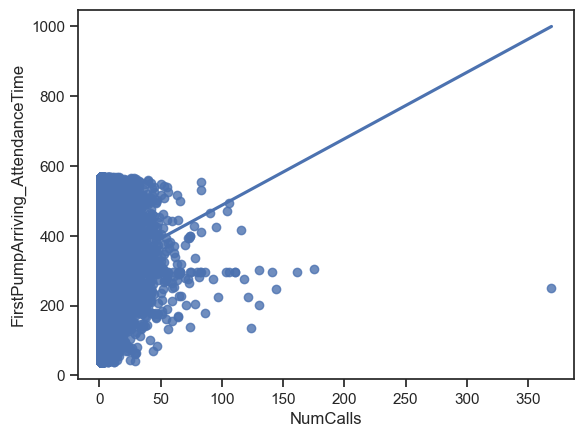

In [ ]:
numeric_features_to_display = ['CalYear','HourOfCall','NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','PumpMinutesRounded','Notional Cost (£)','NumCalls']
#  'CalYear','HourOfCall','FirstPumpArriving_AttendanceTime',

#fig,ax = plt.subplots(2,4,figsize=(20,7))
row = col = 0
for index,col_name in enumerate(numeric_features_to_display):
    
    if (index%4 == 0) & (index > 0):
        row += 1
        col = 0
    # sns.regplot(x=col_name,y="FirstPumpArriving_AttendanceTime",data=incidents_df,ax=ax[row,col],ci=None)
    col += 1
    #plt.show()

for index,col_name in enumerate(numeric_features_to_display):
    sns.regplot(x=col_name,y="FirstPumpArriving_AttendanceTime",data=incidents_df,ci=None)
    plt.show()

#### **2.2.7 Target distribution**

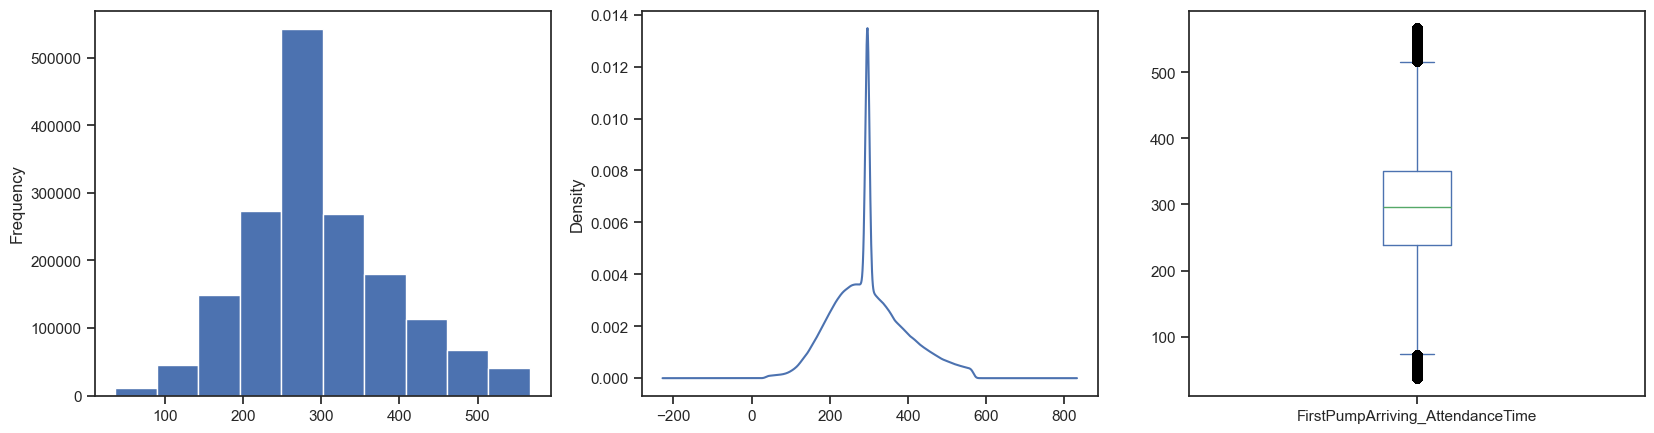

In [ ]:
target = 'FirstPumpArriving_AttendanceTime'
fig,ax = plt.subplots(1,3,figsize=(20,5))
incidents_df[target].plot(kind="hist",ax=ax[0])
incidents_df[target].plot(kind="kde",ax=ax[1])
incidents_df[target].plot(kind="box",ax=ax[2])
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import normaltest

#print(f'{target}: {"Not Gaussian" if normaltest(incidents_df[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(incidents_df[target].values)}')

In [ ]:
# sns.pairplot(incidents_df[numeric_features])
numeric_features

['CalYear',
 'HourOfCall',
 'Easting_rounded',
 'Northing_rounded',
 'FirstPumpArriving_AttendanceTime',
 'NumStationsWithPumpsAttending',
 'NumPumpsAttending',
 'PumpCount',
 'PumpMinutesRounded',
 'Notional Cost (£)',
 'NumCalls']

<Axes: >

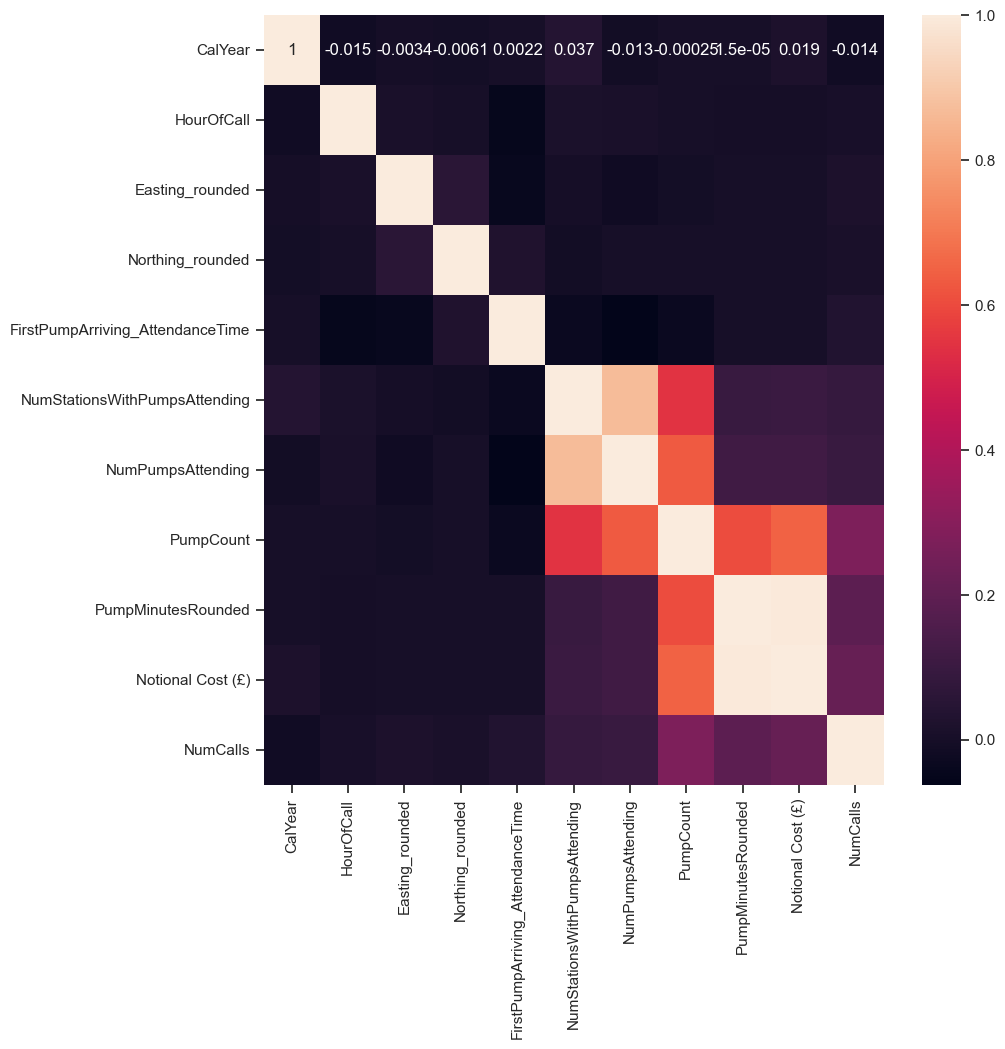

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_features_to_display = ['FirstPumpArriving_AttendanceTime','NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','PumpMinutesRounded','Notional Cost (£)','NumCalls']
corrmat = incidents_df[numeric_features].corr()
#mask= np.zeros_like(corrmat)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,
            #vmax=1, vmin=-1,
            annot=True, 
            #annot_kws={'fontsize':7},
            #mask=mask,
            #cmap=sns.diverging_palette(20,220,as_cmap=True)
            )

In [ ]:
plt.figure(figsize=(8,8))
incidents_df[numeric_features].corr().style.background_gradient(cmap='coolwarm')

,CalYear,HourOfCall,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
CalYear,1.000000,-0.014718,-0.003355,-0.006118,0.002215,0.037101,-0.012846,-0.000246,0.000015,0.019305,-0.013834
HourOfCall,-0.014718,1.000000,0.010132,0.001331,-0.049553,0.013518,0.009155,0.002077,-0.002559,-0.003022,0.006803
Easting_rounded,-0.003355,0.010132,1.000000,0.054487,-0.040007,-0.003284,-0.019715,-0.008115,0.001838,0.001919,0.018393
Northing_rounded,-0.006118,0.001331,0.054487,1.000000,0.027100,-0.011730,0.003357,0.002290,0.001828,0.001745,0.009306
FirstPumpArriving_AttendanceTime,0.002215,-0.049553,-0.040007,0.027100,1.000000,-0.031793,-0.062897,-0.031593,0.002644,0.003014,0.030660
NumStationsWithPumpsAttending,0.037101,0.013518,-0.003284,-0.011730,-0.031793,1.000000,0.868167,0.544487,0.096642,0.099911,0.088031
NumPumpsAttending,-0.012846,0.009155,-0.019715,0.003357,-0.062897,0.868167,1.000000,0.632805,0.117406,0.119609,0.095006
PumpCount,-0.000246,0.002077,-0.008115,0.002290,-0.031593,0.544487,0.632805,1.000000,0.603902,0.647740,0.277305
PumpMinutesRounded,0.000015,-0.002559,0.001838,0.001828,0.002644,0.096642,0.117406,0.603902,1.000000,0.993706,0.193749
Notional Cost (£),0.019305,-0.003022,0.001919,0.001745,0.003014,0.099911,0.119609,0.647740,0.993706,1.000000,0.217906


<Figure size 800x800 with 0 Axes>

In [ ]:
#sns.heatmap(incidents_df[numeric_features].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

In [ ]:
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(incidents_df[numeric_features].corr(method='kendall'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

#### **2.2.8 Relations variables catégorielles/catégorielles**

In [ ]:
# Faire test de CRAMER

#### **2.2.9 Relations variables continues/continues**

In [ ]:
from scipy.stats import pearsonr

numeric_features_inner = numeric_features.copy()

for item_1 in numeric_features:
    for item_2 in numeric_features_inner:
        if (item_1 != item_2) :
            coefficient, p_value = pearsonr(incidents_df[item_1], incidents_df[item_2])
            print("Le coefficient entre les variables '", item_1, "' et '", item_2, "' est de :", coefficient, "et la p-value de", p_value)
    #numeric_features_inner.remove(item_1)

Le coefficient entre les variables ' CalYear ' et ' HourOfCall ' est de : -0.014718196017089704 et la p-value de 1.120452907817086e-81
Le coefficient entre les variables ' CalYear ' et ' Easting_rounded ' est de : -0.0033553402378148 et la p-value de 1.2787734257528827e-05
Le coefficient entre les variables ' CalYear ' et ' Northing_rounded ' est de : -0.006118162929335679 et la p-value de 1.7643165318858748e-15
Le coefficient entre les variables ' CalYear ' et ' FirstPumpArriving_AttendanceTime ' est de : 0.0022145047604565076 et la p-value de 0.0039765535010201514
Le coefficient entre les variables ' CalYear ' et ' NumStationsWithPumpsAttending ' est de : 0.03710137448604379 et la p-value de 0.0
Le coefficient entre les variables ' CalYear ' et ' NumPumpsAttending ' est de : -0.01284550657742882 et la p-value de 1.174298959108555e-62
Le coefficient entre les variables ' CalYear ' et ' PumpCount ' est de : -0.0002462472401432367 et la p-value de 0.748778852658005
Le coefficient entre 

#### **2.2.10 Relations variables continues/catégorielles**

In [ ]:
# Faire test de ANOVA.

#### **2.2.11 Autres analyse**

TODO, Nbre d'incidents par an/mois/semaine etc, le temps reponse moyen par an etc...

#### 3 Lecture des données "Mobilisation"

In [ ]:
## 1.1 Lecture des données "Mobilisation"


In [ ]:
df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")

df1.sample(10)

C:\Users\courio\AppData\Local\Temp\ipykernel_11508\343694789.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
945463,104950-03082017,03-Aug-17,2017,18:26:06,18,False Alarm,AFA,NaN,Non Residential,Bank/Building Society,Within same building,SW3 5UA,SW3,2.171052e+08,21700299.0,E09000020,KENSINGTON AND CHELSEA,Kensington And chelsea,E05009405,STANLEY,STANLEY,527254.0,178134.0,527250,178150,51.487847,-0.168544,London,Chelsea,152.0,Chelsea,NaN,NaN,1.0,1.0,1,60,328,1.0
961451,131298-29092017,29-Sep-17,2017,14:51:19,14,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SM1,0.000000e+00,22602720.0,E09000029,SUTTON,Sutton,E05013765,Sutton Central,Sutton Central,NaN,NaN,526550,164150,NaN,NaN,London,Sutton,369.0,Sutton,519.0,Wallington,2.0,2.0,2,115,629,1.0
524904,71867131.0,06-Jun-13,2013,18:42:37,18,False Alarm,AFA,NaN,Other Residential,Hotel/motel,Correct incident location,W1J 7EB,W1J,1.003353e+10,8400754.0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,528679.0,180075.0,528650,180050,51.504968,-0.147324,London,Soho,341.0,Knightsbridge,NaN,NaN,1.0,1.0,1,60,290,1.0
44232,74423091.0,04-May-09,2009,11:18:37,11,False Alarm,AFA,NaN,Other Residential,Student Hall of Residence,Correct incident location,N1 6HG,N1,1.000231e+11,20900541.0,E09000012,HACKNEY,Hackney,E05009377,Hoxton East & Shoreditch,Hoxton East & Shoreditch,533080.0,182658.0,533050,182650,51.527162,-0.082975,London,Shoreditch,138.0,Shoreditch,NaN,NaN,1.0,2.0,2,60,260,1.0
241488,189513101.0,08-Nov-10,2010,07:00:06,7,False Alarm,AFA,NaN,Non Residential,Hospital,Correct incident location,KT2 7QB,KT2,1.000231e+11,21800429.0,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05013932,Coombe Hill,Coombe Hill,519494.0,169760.0,519450,169750,51.414275,-0.283082,London,Kingston,448.0,Kingston,484.0,Surbiton,2.0,2.0,2,60,260,1.0
244454,4119.0,17-Nov-10,2010,16:33:13,16,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,In street close to gazetteer location,CR5 1EE,CR5,NaN,NaN,E09000008,CROYDON,Croydon,E05000150,Coulsdon East,Coulsdon East,531406.0,157339.0,531450,157350,51.300016,-0.116466,London,Purley,NaN,NaN,NaN,NaN,1.0,1.0,1,90,390,1.0
540855,101058131.0,26-Jul-13,2013,02:46:27,2,Special Service,Special Service,Assist other agencies,Outdoor,Cemetery,Nearby address - street not listed in gazetteer,E2 6EY,E2,NaN,NaN,E09000030,TOWER HAMLETS,Tower Hamlets,E05009335,Weavers,Weavers,534231.0,182471.0,534250,182450,51.525209,-0.066464,London,Bethnal Green,249.0,Bethnal Green,NaN,NaN,1.0,1.0,1,60,290,2.0
873129,157670-19112016,19-Nov-16,2016,20:27:02,20,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,NaN,SE2,0.000000e+00,20101631.0,E09000004,BEXLEY,Bexley,E05011232,Thamesmead East,Thamesmead East,NaN,NaN,547450,179650,NaN,NaN,London,Erith,307.0,Plumstead,308.0,Plumstead,3.0,4.0,4,65,353,1.0
656121,127538141.0,22-Sep-14,2014,08:06:03,8,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,SE9,0.000000e+00,20801617.0,E09000011,GREENWICH,Greenwich,E05014086,"Mottingham, Coldharbour & New Eltham","Mottingham, Coldharbour & New Eltham",NaN,NaN,543350,172550,NaN,NaN,London,Eltham,259.0,Eltham,NaN,NaN,2.0,2.0,2,60,295,1.0
374067,207796111.0,30-Dec-11,2011,00:21:42,0,False Alarm,AFA,NaN,Non Residential,Purpose built office,Correct incident location,EC4Y 8JX,EC4Y,1.009178e+10,8100459.0,E09000001,CITY O

In [ ]:
display(df1.columns)
print(len(df1.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [ ]:
df2 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2018 onwards.csv", encoding='unicode_escape')

df2.sample(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
430616,018349-08022022,8-Feb-22,2022,12:57:48,12,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,N1,0.0,20950049,E09000012,HACKNEY,Hackney,E05009377,HOXTON EAST & SHOREDITCH,HOXTON EAST & SHOREDITCH,NaN,NaN,532750,183650,NaN,NaN,London,Shoreditch,285.0,Shoreditch,293.0,Islington,5.0,5.0,5,86,505,1.0
99689,171762-07122018,7-Dec-18,2018,19:15:29,19,False Alarm,False alarm - Good intent,NaN,Road Vehicle,Car,In street outside gazetteer location,NW2 7PY,NW2,202062268.0,20200296,E09000005,BRENT,Brent,E05013500,Dollis Hill,Dollis Hill,521223.0,186188.0,521250,186150,51.561556,-0.252582,London,Willesden,657.0,Willesden,NaN,NaN,1.0,1.0,1,60,333,1.0
572794,044751-31032023,31-Mar-23,2023,14:43:07,14,False Alarm,False alarm - Malicious,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,HA4,0.0,21400839,E09000017,HILLINGDON,Hillingdon,E05013579,SOUTH RUISLIP,SOUTH RUISLIP,NaN,NaN,511150,185350,NaN,NaN,London,Ruislip,455.0,Ruislip,591.0,Harrow,2.0,2.0,2,60,364,1.0
189239,141612-17102019,17-Oct-19,2019,13:34:26,13,Special Service,Special Service,Flooding,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,N8,0.0,21106375,E09000014,HARINGEY,Haringey,E05013590,Harringay,Harringay,NaN,NaN,531650,189150,NaN,NaN,London,Tottenham,350.0,Hornsey,NaN,NaN,1.0,1.0,1,60,339,1.0
414778,170995-17122021,17-Dec-21,2021,11:10:14,11,False Alarm,AFA,NaN,Non Residential,Doctors surgery,Within same building,IG11 9LT,IG11,100050759.0,19900611,E09000002,BARKING AND DAGENHAM,Barking And dagenham,E05014064,Longbridge,Longbridge,545548.0,184555.0,545550,184550,51.541137,0.097420,London,Barking,318.0,Barking,NaN,NaN,1.0,1.0,1,60,352,1.0
561698,027230-23022023,23-Feb-23,2023,19:44:28,19,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E8,0.0,20901060,E09000012,HACKNEY,Hackney,E05009381,LONDON FIELDS,LONDON FIELDS,NaN,NaN,534450,183750,NaN,NaN,London,Bethnal Green,305.0,Bethnal Green,NaN,NaN,1.0,1.0,1,60,364,1.0
643310,162636-18102023,18-Oct-23,2023,17:33:11,17,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW1,0.0,20400666,E09000007,CAMDEN,Camden,E05013654,CAMDEN SQUARE,CAMDEN SQUARE,NaN,NaN,529850,184350,NaN,NaN,London,Kentish Town,362.0,Holloway,NaN,NaN,1.0,1.0,1,60,388,1.0
323062,021846-25022021,25-Feb-21,2021,12:45:49,12,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,Correct incident location,NaN,SE18,0.0,20800701,E09000011,GREENWICH,Greenwich,E05014087,Plumstead & Glyndon,Plumstead & Glyndon,NaN,NaN,545250,178750,NaN,NaN,London,Plumstead,142.0,Plumstead,NaN,NaN,1.0,1.0,1,60,346,1.0
526350,185883-12112022,12-Nov-22,2022,6:30:44,6,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SE15,0.0,22500833,E09000028,SOUTHWARK,Southwark,E05011108,NUNHEAD & QUEEN'S ROAD,NUNHEAD & QUEEN'S ROAD,NaN,NaN,535250,176350,NaN,NaN,London,New Cross,197.0,New Cross,290.0,Peckham,2.0,2.0,2,60,364,1.0
674400,005547-09012024,9-Jan-24,2024,19:16:21,19,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,NaN,SW6,0.0,21000856,E09000013,HAMMERSMITH AND FULHAM

In [ ]:
display(df2.columns)
print(len(df2.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [ ]:
df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)